<h1>
<font color=Maroon>TELECOM CHURN GROUP CASE STUDY</font>
</h1>

### Team Members
- Anjanava Das Purkayastha
- Bhavik Acharya

<h1>
<font color=Green>Problem Statement</font>
</h1>

## Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## The Givens
1) There are two main models of payment in the telecom industry - postpaid and prepaid. In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn. However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily.

2) Various ways to define churn: Revenue based churn (not using revenue generating facilities such as mobile internet, outgoing calls, etc.) and Usage based churn (Customers who have not done any usage at all)

3) In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

4) Customer Behaviour: Customers usually do not decide to switch to another competitor instantly, but rather over a period of time. In churn prediction, we assume that there are three phases of customer lifecycle :  

  **a) The ‘good’ phase:** *Customer is happy with the service and behaves as usual.*

  **b) The ‘action’ phase:** *The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)*

  **c) The ‘churn’ phase:** *In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.*

<h1>
<font color=Green>Business Objective</font>
</h1>

The business objective is to predict the churn in the last month using the features from the first three months. To accomplish this business objective, following key points are noteworthy:

1) It is important to understand the typical customer behaviour during churn. <br>
2) It is expected of us to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. <br>
3) To use the usage-based definition to define churn.

<h1>
<font color=Green>Work Approach</font>
</h1>

1) Importing relevant libraries <br>
2) Loading Data <br>
3) Data inspection and preparation <br>
4) Exploratory Data Analysis- Univariate and Bivariate Analysis <br>
5) Model building and optimization <br>
6) Evaluation of the model outcome <br>
7) Interpretation and Recommendations

<h1>
<font color=Green>Import Libraries</font>
</h1>

In [1]:
# importing libraries and supress warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

<h1>
<font color=Green>Loading and Viewing Data</font>
</h1>

  **Dataframe name** <br>
TEL_DF = Telecom Dataframe

In [2]:
TEL_DF = pd.read_csv("C:/Users/anjand/Desktop/Data Science/ML2_Group Case_Study/telecom_churn_data.csv")

In [3]:
TEL_DF.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
TEL_DF.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
TEL_DF.shape

(99999, 226)

In [6]:
TEL_DF.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
TEL_DF.describe(include ='O')

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                96377               95239                    25153   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014                6/30/2014   
freq                 14706               22623                     1888   

       date_of_last_rech_data_7 date_of_last_rech_data_8  \
count                     25571                    26339   
unique                       31                       31   
top                   7/31/2014                8/31/2014   
freq                       1813                     1998   

       date_of_last_rech_data_9  
count                     25922  
unique                       30  
top                   9/29/2014  
freq                       2329

In [8]:
TEL_DF.describe(include ='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

1) There are 99999 rows and 226 columns in this dataset <br>
2) As the number of features are quite higher, feature engineering will be a good way to proceed ahead. <br>
3) The mobile column will be unique and can be dropped <br>
4) The columns entailing dates need to reformatted to datetime format. E.g. `last_date_of_month`,`date_of_last_rech`, `date_of_last_rech_data`<br>
5. Some columns like `aug_vbc_3g`, `jul_vbc_3g`, `jun_vbc_3g`, `sep_vbc_3g` needs renaming.<br>
6) Features with less than 32 unique values can be grouped under categorical variables.

<h1>
<font color=Green>Data Inspection and Preparation</font>
</h1>

In [9]:
## Reformating the date features
date_features = TEL_DF.describe(include='O').columns.to_list()
date_features

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [10]:
for i in date_features:
    TEL_DF[i] = pd.to_datetime(TEL_DF[i], format='%m/%d/%Y')

TEL_DF[date_features].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0           2014-09-30          2014-06-21          2014-07-16   
1           2014-09-30          2014-06-29          2014-07-31   
2           2014-09-30          2014-06-17          2014-07-24   
3           2014-09-30          2014-06-28          2014-07-31   
4           2014-09-30          2014-06-26          2014-07-28   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0          2014-08-08          2014-09-28               2014-06-21   
1          2014-08-28          2014-09-30                      NaT   
2          2014-08-14          2014-09-29                      NaT   
3          2014-08-31          2014-09-30                      NaT   
4          2014-08-09          2014-09-28               2014-06-04   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0               2014-07-16               2014-08-08                      NaT  
1               2014-07-25               2014-08-10                      NaT  
2                      NaT                      NaT               2014-09-17  
3                      NaT                      NaT                      NaT  
4                      NaT                      NaT                      NaT

In [11]:
TEL_DF[date_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

In [12]:
## Formatting vbc column names
TEL_DF.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)

In [13]:
TEL_DF.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0           2014-09-30  197.385  214.816  213.803   21.100          NaN   
1           2014-09-30   34.047  355.074  268.321   86.285        24.11   
2           2014-09-30  167.690  189.058  210.226  290.714        11.54   
3           2014-09-30  221.338  251.102  508.054  389.500        99.91   
4           2014-09-30  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [14]:
## Features with <= 36 unique values assumed to be categorical variables.
CAT= TEL_DF.nunique().sort_values()

CAT= CAT[CAT<=36].index.to_list()

CAT

['std_ic_t2o_mou_6',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_7',
 'std_ic_t2o_mou_7',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'last_date_of_month_7',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_8',
 'last_date_of_month_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'night_pck_user_6',
 'fb_user_9',
 'fb_user_8',
 'fb_user_7',
 'fb_user_6',
 'monthly_2g_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_9',
 'monthly_3g_6',
 'monthly_3g_8',
 'monthly_3g_7',
 'sachet_3g_6',
 'count_rech_3g_6',
 'count_rech_3g_9',
 'sachet_3g_9',
 'sachet_3g_7',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'sachet_3g_8',
 'date_of_last_rech_data_9',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_data_8',
 'count_rech_2g_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_8',
 'count_r

In [15]:
TEL_DF[CAT]

std_ic_t2o_mou_6  std_og_t2c_mou_8  std_og_t2c_mou_9  std_ic_t2o_mou_9  \
0                   NaN               0.0               NaN               NaN   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
99994               0.0               0.0               0.0               0.0   
99995               0.0               0.0               0.0               0.0   
99996               0.0               NaN               NaN               NaN   
99997               0.0               0.0               0.0               0.0   
99998               0.0               NaN               NaN               NaN   

       std_ic_t2o_mou_8  std_og_t2c_mou_7  std_ic_t2o_mou_7  \
0                   0.0               NaN               NaN   
1                   0.0               0.0               0.0   
2                   0.0               0.0               0.0   
3                   0.0               0.0               0.0   
4                   0.0               0.0               0.0   
...                 ...               ...               ...   
99994               0.0               0.0               0.0   
99995               0.0               0.0               0.0   
99996               NaN               NaN               NaN   
99997               0.0               0.0               0.0   
99998               NaN               NaN               NaN   

      last_date_of_month_9  std_og_t2c_mou_6 last_date_of_month_7  circle_id  \
0               2014-09-30               NaN           2014-07-31        109   
1               2014-09-30               0.0           2014-07-31        109   
2               2014-09-30               0.0           2014-07-31        109   
3               2014-09-30               0.0           2014-07-31        109   
4               2014-09-30               0.0           2014-07-31        109   
...                    ...               ...                  ...        ...   
99994           2014-09-30               0.0           2014-07-31        109   
99995           2014-09-30               0.0           2014-07-31        109   
99996           2014-09-30               0.0           2014-07-31        109   
99997           2014-09-30               0.0           2014-07-31        109   
99998           2014-09-30               0.0           2014-07-31        109   

       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_8  \
0                 0.0             0.0             0.0           2014-08-31   
1                 0.0             0.0             0.0           2014-08-31   
2                 0.0             0.0             0.0           2014-08-31   
3                 0.0             0.0             0.0           2014-08-31   
4                 0.0             0.0             0.0           2014-08-31   
...               ...             ...             ...                  ...   
99994             0.0             0.0             0.0           2014-08-31   
99995             0.0             0.0             0.0           2014-08-31   
99996             0.0             0.0             0.0           2014-08-31   
99997             0.0             0.0             0.0           2014-08-31   
99998             0.0             0.0             0.0           2014-08-31   

      last_date_of_month_6  night_pck_user_7  night_pck_user_8  \
0               2014-06-30               0.0               0.0   
1               2014-06-30               0.0               0.0   
2               2014-06-30               NaN               NaN   
3               2014-06-30               NaN               NaN   
4               2014-06-30               NaN     

In [16]:
## Checking the data distribution of the categorical features in terms of percentage
for i in CAT:
    print(100*TEL_DF[i].value_counts(normalize=True))
    print ('\n')

0.0    100.0
Name: std_ic_t2o_mou_6, dtype: float64


0.0    100.0
Name: std_og_t2c_mou_8, dtype: float64


0.0    100.0
Name: std_og_t2c_mou_9, dtype: float64


0.0    100.0
Name: std_ic_t2o_mou_9, dtype: float64


0.0    100.0
Name: std_ic_t2o_mou_8, dtype: float64


0.0    100.0
Name: std_og_t2c_mou_7, dtype: float64


0.0    100.0
Name: std_ic_t2o_mou_7, dtype: float64


2014-09-30    100.0
Name: last_date_of_month_9, dtype: float64


0.0    100.0
Name: std_og_t2c_mou_6, dtype: float64


2014-07-31    100.0
Name: last_date_of_month_7, dtype: float64


109    100.0
Name: circle_id, dtype: float64


0.0    100.0
Name: loc_og_t2o_mou, dtype: float64


0.0    100.0
Name: std_og_t2o_mou, dtype: float64


0.0    100.0
Name: loc_ic_t2o_mou, dtype: float64


2014-08-31    100.0
Name: last_date_of_month_8, dtype: float64


2014-06-30    100.0
Name: last_date_of_month_6, dtype: float64


0.0    97.696609
1.0     2.303391
Name: night_pck_user_7, dtype: float64


0.0    97.915638
1.0     2.084

1) The feature "Circle_ID" has only one value and can be dropped <br>
2) The date columns need to be dropped.<br>
3) Also needs to drop these features too, as they have only the same type categorical values: std_ic_t2o_mou_6`,`std_og_t2c_mou_8`,`std_og_t2c_mou_9`,`std_ic_t2o_mou_9`,`std_ic_t2o_mou_8`,
    ,`std_og_t2c_mou_7`,`std_ic_t2o_mou_7`,`std_og_t2c_mou_6`,`loc_og_t2o_mou`,`std_og_t2o_mou`,`loc_ic_t2o_mou` <br>
4) The rest of the categorical columns can be dealth in EDA.<br>

In [17]:
## Dropping Circle_ID
TEL_DF.drop(['circle_id'],axis=1,inplace=True)

In [18]:
## Dropping the date columns
TEL_DF.drop(['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'""],axis=1,inplace=True)

In [19]:
## Dropping other irrelevant columns
TEL_DF.drop(['std_ic_t2o_mou_6','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_9','std_ic_t2o_mou_8',
    'std_og_t2c_mou_7','std_ic_t2o_mou_7','std_og_t2c_mou_6',
              'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace=True)

In [20]:
TEL_DF.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [21]:
TEL_DF.shape

(99999, 210)

In [22]:
## Numerical Columns
NUM = []

for x in TEL_DF.columns:
    if x not in CAT:
        NUM.append(x)
        
NUM

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [23]:
TEL_DF[NUM].head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [24]:
TEL_DF[NUM].describe()

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
mean    7.001207e+09    282.987358    278.536648    279.154731    261.645069   
std     6.956694e+05    328.439770    338.156291    344.474791    341.998630   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%     7.000606e+09     93.411500     86.980500     84.126000     62.685000   
50%     7.001205e+09    197.704000    191.640000    192.080000    176.849000   
75%     7.001812e+09    371.060000    365.344500    369.370500    353.466500   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000 

In [25]:
## Checking for missing values (>70%)
missing = round(((TEL_DF.isnull().sum()/99999)*100).sort_values(ascending=False),2)
missing =missing[missing>70]
missing

night_pck_user_6            74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
night_pck_user_7            74.43
arpu_2g_7                   74.43
total_rech_data_7           74.43
arpu_3g_7                   74.43
max_rech_data_7             74.43
av_rech_amt_data_7          74.43
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
av_rech_amt_data_9          74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
count_rech_2g_9             74.08
night_pck_user

- Many of the features having such amount missing values are connected to each other monthwise. Hence dropping them all would be a significant loss of KPI information from these months. We can replace them by "0" <br>
- Features with missing values less than 10% will be dealt via KNN imputer.

In [26]:
# keeping aside the date columns for the time being
missing.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7',
            'date_of_last_rech_data_8','date_of_last_rech_data_9'],inplace=True)

In [27]:
for column in missing.index:
    TEL_DF[column].fillna(value=0, inplace=True)

missing = round(((TEL_DF.isnull().sum()/99999)*100).sort_values(ascending=False),2)
missing

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
std_ic_mou_9                 7.75
std_og_t2t_mou_9             7.75
loc_og_t2m_mou_9             7.75
loc_ic_t2m_mou_9             7.75
loc_og_t2f_mou_9             7.75
loc_og_t2c_mou_9             7.75
loc_og_mou_9                 7.75
isd_ic_mou_9                 7.75
std_og_t2f_mou_9             7.75
ic_others_9                  7.75
std_og_t2m_mou_9             7.75
loc_ic_t2f_mou_9             7.75
loc_ic_t2t_mou_9             7.75
std_og_mou_9                 7.75
og_others_9                  7.75
isd_og_mou_9                 7.75
loc_og_t2t_mou_9             7.75
spl_ic_mou_9                 7.75
spl_og_mou_9                 7.75
std_ic_t2t_mou_9             7.75
std_ic_t2m_mou_9             7.75
onnet_mou_9                  7.75
offnet_mou_9                 7.75
std_ic_t2f_mou_9             7.75
roam_ic_mou_9                7.75
loc_ic_mou_9  

In [28]:
TEL_DF.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [29]:
## Dropping the identifier variable "mobile_number", which is not required for modellingy
TEL_DF.drop(['mobile_number'], axis=1, inplace=True)

In [30]:
## Recharge amount columns
RECH_AMT =  TEL_DF.columns[TEL_DF.columns.str.contains('rech_amt|rech_data')]

print(RECH_AMT)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


Let us now check for High Value Customers (HVC) and then do the KNN imputation

In [31]:
## Creating new metrics to filter out HVC

# Total data recharge (TDC) = number of recharges * avg recharge amount
TEL_DF['TDC_6'] = TEL_DF.total_rech_data_6 * TEL_DF.av_rech_amt_data_6
TEL_DF['TDC_7'] = TEL_DF.total_rech_data_7 * TEL_DF.av_rech_amt_data_7

# Total recharge amount(TRA) = call recharge amount + data recharge amount
TEL_DF['TRA_6'] = TEL_DF.total_rech_amt_6 + TEL_DF.TDC_6
TEL_DF['TRA_7'] = TEL_DF.total_rech_amt_7 + TEL_DF.TDC_7

# Average recharge (AR) during June-July
TEL_DF['AR_6_7'] = (TEL_DF.TRA_6 + TEL_DF.TRA_7)/2

# HVC can be classified as top 30% customers(70th percentile and above band)
print("HVC_Threshold: {0}".format(TEL_DF.AR_6_7.quantile(0.7)))


HVC_Threshold: 478.0


- The threshold value to classify High Value Customers is average monthly recharge amount, which comes to be Rs. 478. Anybody recharging with an amount of Rs. 478 and above are High Value Customers. <br>
- Churn model created on these customers will have significant impact on company's business strategy.

In [32]:
## Making a new dataframe with HVC (TEL_HVC)
TEL_HVC = TEL_DF.loc[TEL_DF.AR_6_7 >= TEL_DF.AR_6_7.quantile(0.7), :]

TEL_HVC.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803   21.100          NaN          NaN   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
21   514.453   597.753   637.760  578.596       102.41       132.11   
23    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00          NaN           NaN           NaN          0.00   
7         52.29          NaN        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
7            NaN          16.23          33.49          31.64            NaN   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN           0.00            NaN   
7           23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04         60.71            116.56   
21         97.04         94.09        129.74        137.53  

**Creating New Variables**

In [33]:
## Bring out the maximum time stamp (MTS)
x = TEL_HVC[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max()
date_MTS = x.max()

# Changing last recharge date (date_LR) columns for months 6, 7, 8 to days since recharge (day_SR)
TEL_HVC['date_LR'] = TEL_HVC['date_of_last_rech_8']
TEL_HVC.loc[TEL_HVC.date_LR.isnull(), 'date_LR'] = TEL_HVC['date_of_last_rech_7']
TEL_HVC.loc[TEL_HVC.date_LR.isnull(), 'date_LR'] = TEL_HVC['date_of_last_rech_6']
TEL_HVC['day_SR'] = (date_MTS - TEL_HVC['date_LR']).dt.days

In [34]:
TEL_HVC.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803   21.100          NaN          NaN   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
21   514.453   597.753   637.760  578.596       102.41       132.11   
23    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00          NaN           NaN           NaN          0.00   
7         52.29          NaN        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
7            NaN          16.23          33.49          31.64            NaN   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN           0.00            NaN   
7           23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04         60.71            116.56   
21         97.04         94.09        129.74        137.53  

In [35]:
## Drop the date columns
date_col = TEL_HVC.columns[TEL_HVC.columns.str.contains('date')]

TEL_HVC.drop(date_col, axis = 1 , inplace = True)

In [36]:
# Creating new variables-Difference between the 8th month value and average value of 6th and 7th month

TEL_HVC['arpu_diff'] = TEL_HVC.arpu_8 - ((TEL_HVC.arpu_6 + TEL_HVC.arpu_7)/2)

TEL_HVC['onnet_mou_diff'] = TEL_HVC.onnet_mou_8 - ((TEL_HVC.onnet_mou_6 + TEL_HVC.onnet_mou_7)/2)

TEL_HVC['offnet_mou_diff'] = TEL_HVC.offnet_mou_8 - ((TEL_HVC.offnet_mou_6 + TEL_HVC.offnet_mou_7)/2)

TEL_HVC['roam_ic_mou_diff'] = TEL_HVC.roam_ic_mou_8 - ((TEL_HVC.roam_ic_mou_6 + TEL_HVC.roam_ic_mou_7)/2)

TEL_HVC['roam_og_mou_diff'] = TEL_HVC.roam_og_mou_8 - ((TEL_HVC.roam_og_mou_6 + TEL_HVC.roam_og_mou_7)/2)

TEL_HVC['loc_og_mou_diff'] = TEL_HVC.loc_og_mou_8 - ((TEL_HVC.loc_og_mou_6 + TEL_HVC.loc_og_mou_7)/2)

TEL_HVC['std_og_mou_diff'] = TEL_HVC.std_og_mou_8 - ((TEL_HVC.std_og_mou_6 + TEL_HVC.std_og_mou_7)/2)

TEL_HVC['isd_og_mou_diff'] = TEL_HVC.isd_og_mou_8 - ((TEL_HVC.isd_og_mou_6 + TEL_HVC.isd_og_mou_7)/2)

TEL_HVC['spl_og_mou_diff'] = TEL_HVC.spl_og_mou_8 - ((TEL_HVC.spl_og_mou_6 + TEL_HVC.spl_og_mou_7)/2)

TEL_HVC['total_og_mou_diff'] = TEL_HVC.total_og_mou_8 - ((TEL_HVC.total_og_mou_6 + TEL_HVC.total_og_mou_7)/2)

TEL_HVC['loc_ic_mou_diff'] = TEL_HVC.loc_ic_mou_8 - ((TEL_HVC.loc_ic_mou_6 + TEL_HVC.loc_ic_mou_7)/2)

TEL_HVC['std_ic_mou_diff'] = TEL_HVC.std_ic_mou_8 - ((TEL_HVC.std_ic_mou_6 + TEL_HVC.std_ic_mou_7)/2)

TEL_HVC['isd_ic_mou_diff'] = TEL_HVC.isd_ic_mou_8 - ((TEL_HVC.isd_ic_mou_6 + TEL_HVC.isd_ic_mou_7)/2)

TEL_HVC['spl_ic_mou_diff'] = TEL_HVC.spl_ic_mou_8 - ((TEL_HVC.spl_ic_mou_6 + TEL_HVC.spl_ic_mou_7)/2)

TEL_HVC['total_ic_mou_diff'] = TEL_HVC.total_ic_mou_8 - ((TEL_HVC.total_ic_mou_6 + TEL_HVC.total_ic_mou_7)/2)

TEL_HVC['total_rech_num_diff'] = TEL_HVC.total_rech_num_8 - ((TEL_HVC.total_rech_num_6 + TEL_HVC.total_rech_num_7)/2)

TEL_HVC['total_rech_amt_diff'] = TEL_HVC.total_rech_amt_8 - ((TEL_HVC.total_rech_amt_6 + TEL_HVC.total_rech_amt_7)/2)

TEL_HVC['max_rech_amt_diff'] = TEL_HVC.max_rech_amt_8 - ((TEL_HVC.max_rech_amt_6 + TEL_HVC.max_rech_amt_7)/2)

TEL_HVC['total_rech_data_diff'] = TEL_HVC.total_rech_data_8 - ((TEL_HVC.total_rech_data_6 + TEL_HVC.total_rech_data_7)/2)

TEL_HVC['max_rech_data_diff'] = TEL_HVC.max_rech_data_8 - ((TEL_HVC.max_rech_data_6 + TEL_HVC.max_rech_data_7)/2)

TEL_HVC['av_rech_amt_data_diff'] = TEL_HVC.av_rech_amt_data_8 - ((TEL_HVC.av_rech_amt_data_6 + TEL_HVC.av_rech_amt_data_7)/2)

TEL_HVC['vol_2g_mb_diff'] = TEL_HVC.vol_2g_mb_8 - ((TEL_HVC.vol_2g_mb_6 + TEL_HVC.vol_2g_mb_7)/2)

TEL_HVC['vol_3g_mb_diff'] = TEL_HVC.vol_3g_mb_8 - ((TEL_HVC.vol_3g_mb_6 + TEL_HVC.vol_3g_mb_7)/2)

In [37]:
TEL_HVC.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803   21.100          NaN          NaN   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
21   514.453   597.753   637.760  578.596       102.41       132.11   
23    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00          NaN           NaN           NaN          0.00   
7         52.29          NaN        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
7            NaN          16.23          33.49          31.64            NaN   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN           0.00            NaN   
7           23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04         60.71            116.56   
21         97.04         94.09        129.74        137.53  

In [38]:
## We can drop the temporary variables created to filter out HVC.
TEL_HVC = TEL_HVC.drop(['TDC_6', 'TDC_7','TRA_6', 'TRA_7','AR_6_7'], axis=1)
TEL_HVC.shape

(30001, 225)

In [39]:
TEL_HVC.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803   21.100          NaN          NaN   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
21   514.453   597.753   637.760  578.596       102.41       132.11   
23    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00          NaN           NaN           NaN          0.00   
7         52.29          NaN        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
7            NaN          16.23          33.49          31.64            NaN   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN           0.00            NaN   
7           23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04         60.71            116.56   
21         97.04         94.09        129.74        137.53  

**Four key parameters to evaluate the churn model outcome:** <br>
1) Churn percentage <br>
2) Internet (2g and 3g) consumption <br>
3) Incoming and outgoing usage <br>
4) Churn Variable, which is based on the condition that no calls and not internet usage has been made in September

In [40]:
# Total Call time (Temporary variable)
TEL_HVC['tot_call_mou_9'] = TEL_HVC.total_ic_mou_9 + TEL_HVC.total_og_mou_9

# Total internet usage (Temporary varibale)
TEL_HVC['tot_net_mb_9'] =  TEL_HVC.vol_2g_mb_9 + TEL_HVC.vol_3g_mb_9 

In [41]:
# Derving Churn variable as per the churn condition mentioned above
TEL_HVC['churn'] = TEL_HVC.apply(lambda row: 1 if (row.tot_call_mou_9 == 0 and row.tot_net_mb_9 == 0) else 0, axis=1)

# Remove the temporary derived variables, as we can go ahead with churn variable only.
TEL_HVC = TEL_HVC.drop(['tot_call_mou_9', 'tot_net_mb_9'], axis=1)


TEL_HVC.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803   21.100          NaN          NaN   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
21   514.453   597.753   637.760  578.596       102.41       132.11   
23    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00          NaN           NaN           NaN          0.00   
7         52.29          NaN        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
7            NaN          16.23          33.49          31.64            NaN   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN           0.00            NaN   
7           23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04         60.71            116.56   
21         97.04         94.09        129.74        137.53  

In [42]:
## Checking churn quantity and percentage..

print("Total Churn was ", (TEL_HVC.churn[TEL_HVC.churn == 1].count()))
print("Out of ", (len(TEL_HVC)))

print("Churn % = ", (TEL_HVC.churn[TEL_HVC.churn == 1].count())*100 / (len(TEL_HVC)))

Total Churn was  2441
Out of  30001
Churn % =  8.136395453484884


In [43]:
## Delete all the september columns
SEP_Col  = TEL_HVC.columns[TEL_HVC.columns.str.contains('_9')]
SEP_Col

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9', 'vbc_3g_9'],
      dtype='object')

In [44]:
TEL_HVC.drop(SEP_Col, axis = 1 , inplace = True)
TEL_HVC.shape

(30001, 176)

**Checking again the categorical and numerical features in the HVC category, alongwith the missing value imputations**

In [45]:
TEL_HVC.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 176 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   arpu_6                 float64
 1   arpu_7                 float64
 2   arpu_8                 float64
 3   onnet_mou_6            float64
 4   onnet_mou_7            float64
 5   onnet_mou_8            float64
 6   offnet_mou_6           float64
 7   offnet_mou_7           float64
 8   offnet_mou_8           float64
 9   roam_ic_mou_6          float64
 10  roam_ic_mou_7          float64
 11  roam_ic_mou_8          float64
 12  roam_og_mou_6          float64
 13  roam_og_mou_7          float64
 14  roam_og_mou_8          float64
 15  loc_og_t2t_mou_6       float64
 16  loc_og_t2t_mou_7       float64
 17  loc_og_t2t_mou_8       float64
 18  loc_og_t2m_mou_6       float64
 19  loc_og_t2m_mou_7       float64
 20  loc_og_t2m_mou_8       float64
 21  loc_og_t2f_mou_6       float64
 22  loc_og_t2f_mou_7     

*Initially the maximum number of unique values in a column in the original dataset was 36. After that all the new columns added are just derived from these existing columns. Hence the maximum number of unique value would still remain the same i.e. 36*

In [46]:
CAT= TEL_HVC.nunique().sort_values()

CAT = CAT[CAT<=36].index.to_list()

CAT

['churn',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_8',
 'fb_user_7',
 'fb_user_6',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'count_rech_3g_6',
 'sachet_3g_6',
 'sachet_3g_7',
 'count_rech_3g_7',
 'sachet_3g_8',
 'count_rech_3g_8',
 'sachet_2g_6',
 'count_rech_2g_6',
 'sachet_2g_8',
 'count_rech_2g_8',
 'sachet_2g_7',
 'count_rech_2g_7']

In [47]:
## Numerical columns
NUM = []

for x in TEL_HVC.columns:
    if x not in CAT:
        NUM.append(x)
        
NUM

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [48]:
## Missing values in HVC dataframe
missing = round(((TEL_HVC.isnull().sum()/30001)*100).sort_values(ascending=False),2)
missing

offnet_mou_diff          4.99
isd_ic_mou_diff          4.99
onnet_mou_diff           4.99
roam_ic_mou_diff         4.99
roam_og_mou_diff         4.99
loc_og_mou_diff          4.99
std_og_mou_diff          4.99
isd_og_mou_diff          4.99
spl_og_mou_diff          4.99
loc_ic_mou_diff          4.99
std_ic_mou_diff          4.99
spl_ic_mou_diff          4.99
std_og_mou_8             3.91
spl_og_mou_8             3.91
loc_ic_mou_8             3.91
loc_og_t2m_mou_8         3.91
loc_ic_t2f_mou_8         3.91
std_og_t2t_mou_8         3.91
loc_og_t2f_mou_8         3.91
loc_ic_t2m_mou_8         3.91
loc_og_t2c_mou_8         3.91
loc_og_t2t_mou_8         3.91
loc_ic_t2t_mou_8         3.91
std_ic_t2t_mou_8         3.91
roam_og_mou_8            3.91
og_others_8              3.91
std_ic_t2m_mou_8         3.91
roam_ic_mou_8            3.91
std_og_t2m_mou_8         3.91
loc_og_mou_8             3.91
ic_others_8              3.91
offnet_mou_8             3.91
isd_ic_mou_8             3.91
std_ic_mou

**Imputing the missing values in HVC dataframe using KNN Imputer (as its <10%)**

In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [50]:
%%time
imputer = KNNImputer()
TEL_HVC_imputed = imputer.fit_transform(TEL_HVC)

Wall time: 1min 14s


In [51]:
TEL_HVC_imputed.shape

(30001, 176)

In [52]:
TEL_HVC_DF = pd.DataFrame(TEL_HVC_imputed,columns=TEL_HVC.columns,index=TEL_HVC.index)
TEL_HVC_DF.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803        7.146         2.37         0.00   
7   1069.180  1349.850  3171.480       57.840        54.68        52.29   
8    378.721   492.223   137.362      413.690       351.03        35.08   
21   514.453   597.753   637.760      102.410       132.11        85.14   
23    74.350   193.897   366.966       48.960        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         52.164        34.782          0.00           0.00           0.00   
7        453.430       567.160        325.91          16.23          33.49   
8         94.660        80.630        136.48           0.00           0.00   
21       757.930       896.680        983.39           0.00           0.00   
23        85.410        89.360        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              7.146             2.294              0.00            49.576   
7             51.390            31.380             40.28           308.630   
8            297.130           217.590             12.49            80.960   
21             4.480             6.160             23.34            91.810   
23            48.960            50.660             33.58            82.940   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             28.898              0.00             0.978              0.00   
7            447.380            162.28            62.130             55.14   
8             70.580             50.54             0.000              0.00   
21            87.930            104.81             0.750              0.00   
23            83.010            148.56             0.000              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00             1.366             0.516              0.00   
7              53.23             0.000             0.000              0.00   
8               0.00             0.000             0.000              7.15   
21              1.58             0.000             0.000              0.00   
23              0.00             0.000             0.000             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         57.706        31.194          0.00              0.00   
7        422.160       533.910        255.79              4.30   
8        378.090       288.180         63.04            116.56   
21        97.040        94.090        129.74             97.93   
23       131.910       133.680        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.076              0.00              0.00             4.262   
7             23.290             12.01             49.89            31.760   
8            133.430             22.58             13.69            10.040   
21           125.940             61.79            665.36           808.740   
23             0.000              0.00              2.36             6.350   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [53]:
##Checking again on the missing values
missing = round(((TEL_HVC_DF.isnull().sum()/99999)*100).sort_values(ascending=False),2)
missing

churn                    0.0
vol_3g_mb_diff           0.0
loc_ic_mou_6             0.0
loc_ic_t2f_mou_8         0.0
loc_ic_t2f_mou_7         0.0
loc_ic_t2f_mou_6         0.0
loc_ic_t2m_mou_8         0.0
loc_ic_t2m_mou_7         0.0
loc_ic_t2m_mou_6         0.0
loc_ic_t2t_mou_8         0.0
loc_ic_t2t_mou_7         0.0
loc_ic_t2t_mou_6         0.0
total_og_mou_8           0.0
total_og_mou_7           0.0
total_og_mou_6           0.0
og_others_8              0.0
og_others_7              0.0
og_others_6              0.0
spl_og_mou_8             0.0
spl_og_mou_7             0.0
spl_og_mou_6             0.0
loc_ic_mou_7             0.0
loc_ic_mou_8             0.0
std_ic_t2t_mou_6         0.0
std_ic_mou_8             0.0
isd_ic_mou_7             0.0
isd_ic_mou_6             0.0
spl_ic_mou_8             0.0
spl_ic_mou_7             0.0
spl_ic_mou_6             0.0
total_ic_mou_8           0.0
total_ic_mou_7           0.0
total_ic_mou_6           0.0
std_ic_mou_7             0.0
std_ic_t2t_mou

In [54]:
##Checking for duplicates
TEL_HVC_DF[TEL_HVC_DF.duplicated()]

Empty DataFrame
Columns: [arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_mou_6, std_og_mou_7, std_og_mou_8, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, og_others_6, og_others_7, og_others_8, total_og_mou_6, total_og_mou_7, total_og_mou_8, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, std_ic_mou_6, std_ic_mou_7, std_ic_mou_8, total_ic_mou_6, total_ic_mou_7, total_ic_mou_8, spl_ic_mou_6, spl_ic_mou_7, spl_ic_mou_8, isd_ic_mou_6, isd_ic_mou_7, isd_ic_mou_8, ic_others_6, ic_others_7, ic_others_8, total_rech_num_6, total_rech_num_7, total_rech_num_8, total_rech_amt_6, total_rech_amt_7, total_rech_amt_8, max_rech_amt_6, max_rech_amt_7, max_rech_amt_8, last_day_rch_amt_6, ...]
Index: []

**No missing values and no duplicates left**

<h1>
<font color=Green>Exploratory Data Analysis</font>
</h1>

## Numerical Columns-Univariate Analysis

In [55]:
TEL_HVC_DF.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803        7.146         2.37         0.00   
7   1069.180  1349.850  3171.480       57.840        54.68        52.29   
8    378.721   492.223   137.362      413.690       351.03        35.08   
21   514.453   597.753   637.760      102.410       132.11        85.14   
23    74.350   193.897   366.966       48.960        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         52.164        34.782          0.00           0.00           0.00   
7        453.430       567.160        325.91          16.23          33.49   
8         94.660        80.630        136.48           0.00           0.00   
21       757.930       896.680        983.39           0.00           0.00   
23        85.410        89.360        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              7.146             2.294              0.00            49.576   
7             51.390            31.380             40.28           308.630   
8            297.130           217.590             12.49            80.960   
21             4.480             6.160             23.34            91.810   
23            48.960            50.660             33.58            82.940   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             28.898              0.00             0.978              0.00   
7            447.380            162.28            62.130             55.14   
8             70.580             50.54             0.000              0.00   
21            87.930            104.81             0.750              0.00   
23            83.010            148.56             0.000              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00             1.366             0.516              0.00   
7              53.23             0.000             0.000              0.00   
8               0.00             0.000             0.000              7.15   
21              1.58             0.000             0.000              0.00   
23              0.00             0.000             0.000             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         57.706        31.194          0.00              0.00   
7        422.160       533.910        255.79              4.30   
8        378.090       288.180         63.04            116.56   
21        97.040        94.090        129.74             97.93   
23       131.910       133.680        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.076              0.00              0.00             4.262   
7             23.290             12.01             49.89            31.760   
8            133.430             22.58             13.69            10.040   
21           125.940             61.79            665.36           808.740   
23             0.000              0.00              2.36             6.350   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [56]:
CAT= TEL_HVC_DF.nunique().sort_values()

CAT = CAT[CAT<=36].index.to_list()

CAT

['churn',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_8',
 'fb_user_7',
 'fb_user_6',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'count_rech_3g_6',
 'sachet_3g_6',
 'sachet_3g_7',
 'count_rech_3g_7',
 'sachet_3g_8',
 'count_rech_3g_8',
 'sachet_2g_6',
 'count_rech_2g_6',
 'sachet_2g_8',
 'count_rech_2g_8',
 'sachet_2g_7',
 'count_rech_2g_7']

In [57]:
## Numerical columns
NUM = []

for x in TEL_HVC_DF.columns:
    if x not in CAT:
        NUM.append(x)
        
NUM

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [58]:
TEL_HVC_DF[CAT].shape

(30001, 25)

In [59]:
TEL_HVC_DF[NUM].shape

(30001, 151)

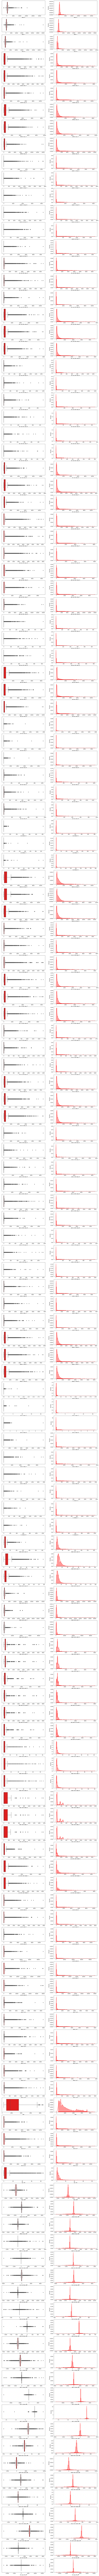

In [60]:
## Numerical Features- Boxplot and Distribution Plot
plt.figure(figsize=(18, 500))
for column in enumerate(NUM):
    plt.subplot(len(NUM), 2, 2*column[0]+1)
    sns.boxplot(TEL_HVC_DF[column[1]],color='red')
    plt.subplot(len(NUM), 2, 2*column[0]+2)
    sns.distplot(TEL_HVC_DF[column[1]],color='red',rug=True, kde_kws={'bw':0.1})
plt.show()

In [61]:
## Variance (data distribution) in the numerical features
for features in NUM:
    print("Data Dist for"+" "+ str(features))
    print(TEL_HVC_DF[features].value_counts(normalize=True)*100)
    print('--'*50)

Data Dist for arpu_6
0.000      0.756641
213.821    0.059998
213.822    0.056665
213.818    0.053332
213.815    0.046665
             ...   
437.577    0.003333
404.898    0.003333
566.285    0.003333
108.260    0.003333
337.604    0.003333
Name: arpu_6, Length: 29072, dtype: float64
----------------------------------------------------------------------------------------------------
Data Dist for arpu_7
0.000       0.743309
213.795     0.063331
213.808     0.049998
213.814     0.043332
213.816     0.043332
              ...   
373.537     0.003333
2210.547    0.003333
334.576     0.003333
670.848     0.003333
469.810     0.003333
Name: arpu_7, Length: 29084, dtype: float64
----------------------------------------------------------------------------------------------------
Data Dist for arpu_8
 0.000       3.366554
 213.801     0.096663
-5.000       0.096663
 213.785     0.053332
 130.413     0.039999
               ...   
 541.290     0.003333
 74.891      0.003333
 538.339     0.00333

- Skewness seen in many featutres
- Outliers present in many attributes
- Columns like 'og_others_6','isd_og_mou_6' have extremely low variance (one value dominating-90%). They need to be dropped

In [62]:
## Dropping the low variance ones (Variance_L)
Variance_L = TEL_HVC_DF.columns[TEL_HVC_DF.columns.str.contains('isd_og|og_others')].to_list()
Variance_L.remove('isd_og_mou_diff')

In [63]:
TEL_HVC_DF.drop(Variance_L,axis=1,inplace=True)

In [64]:
TEL_HVC_DF.shape

(30001, 170)

## Categorical Columns-Univariate Analysis

<Figure size 1080x2880 with 0 Axes>

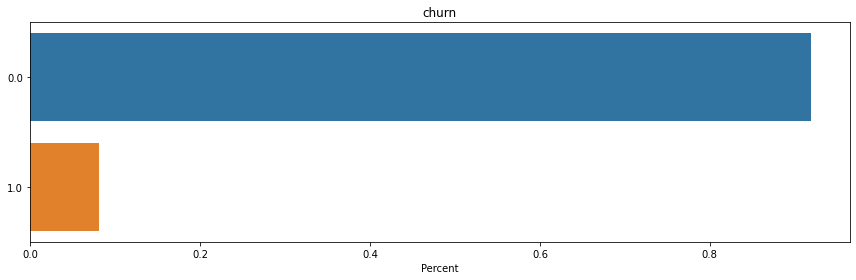

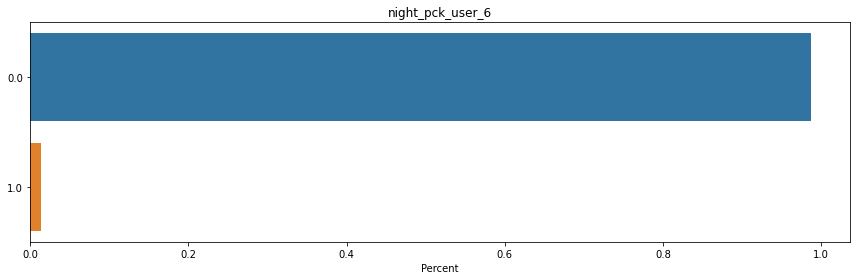

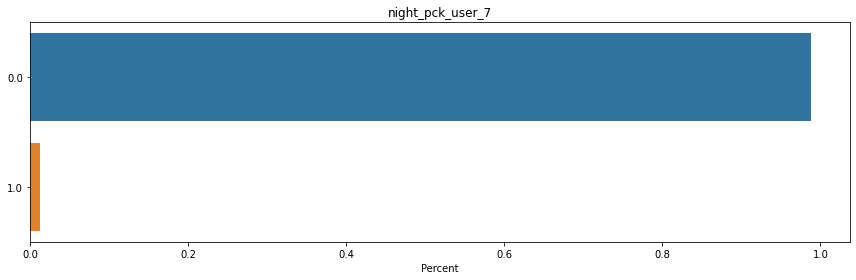

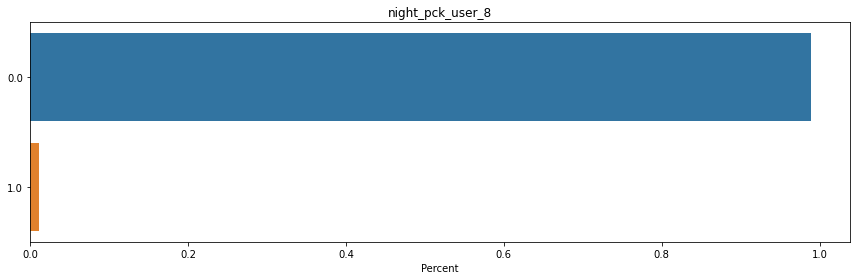

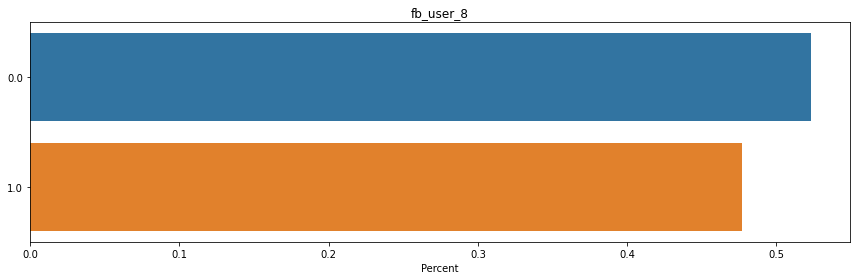

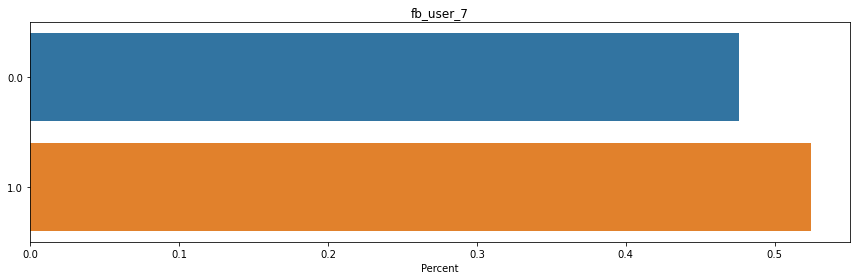

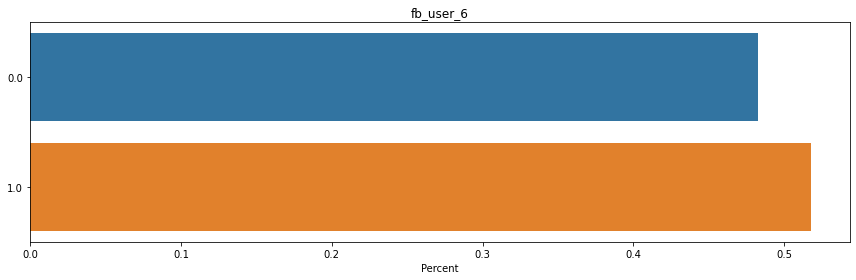

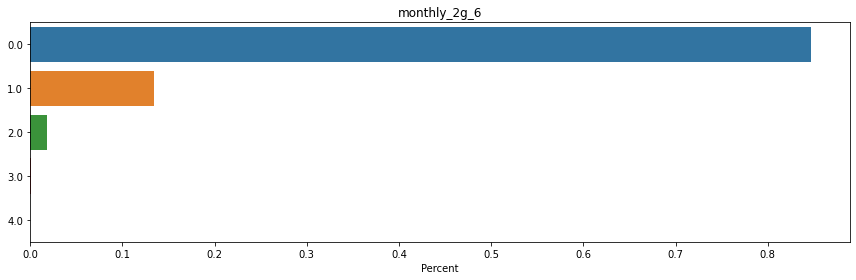

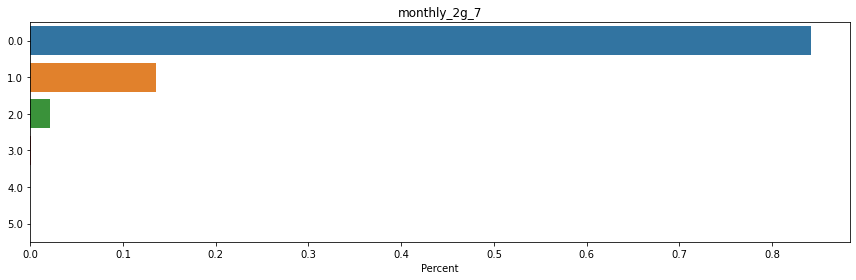

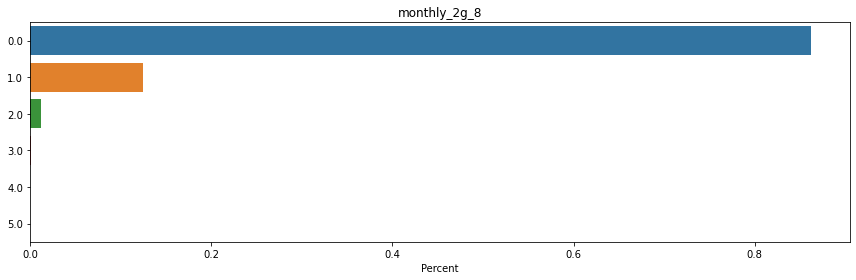

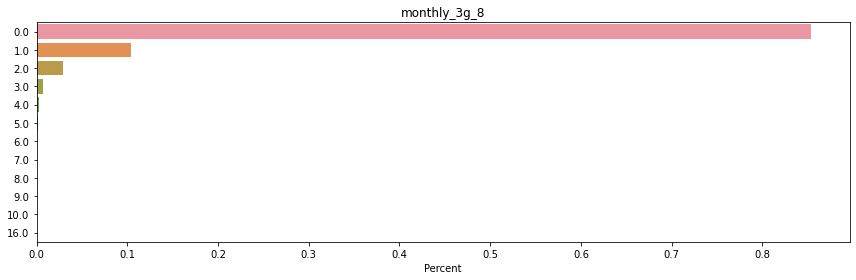

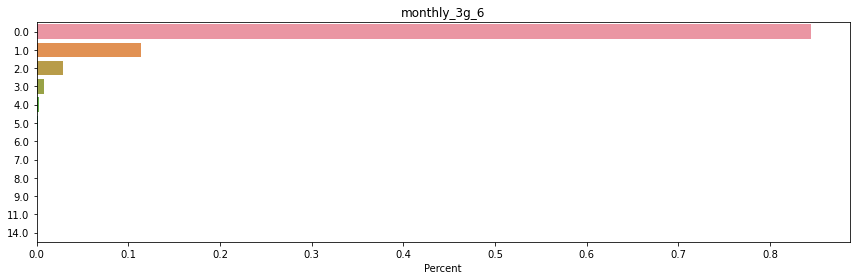

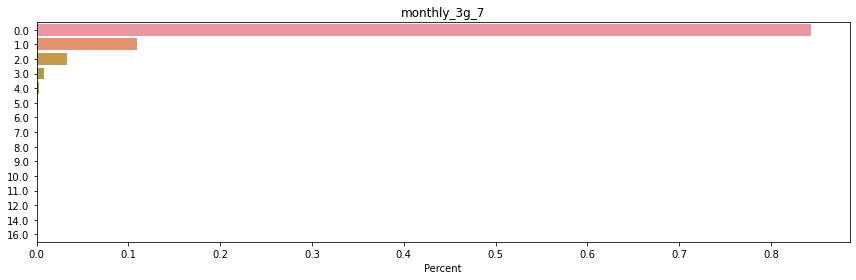

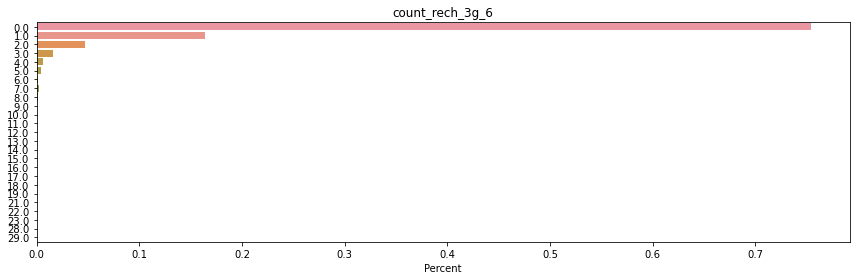

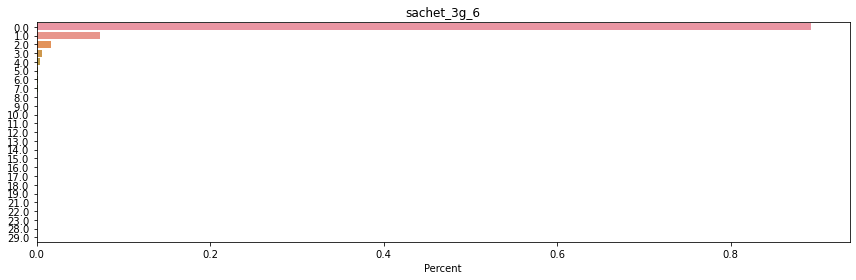

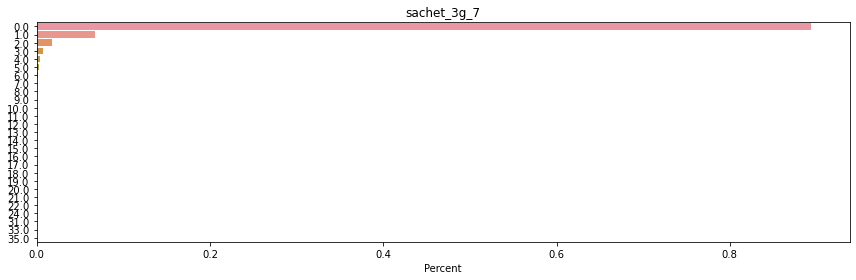

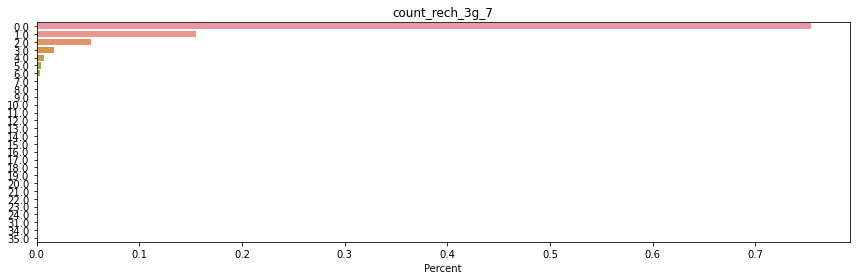

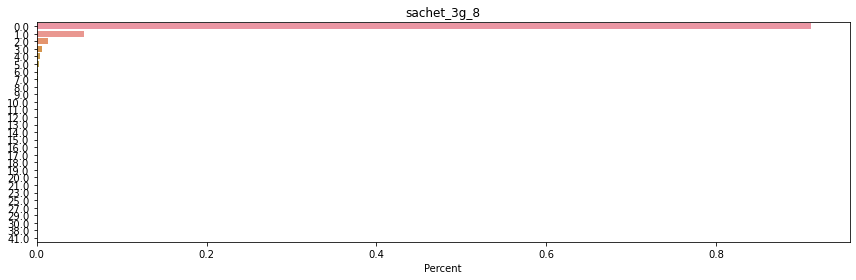

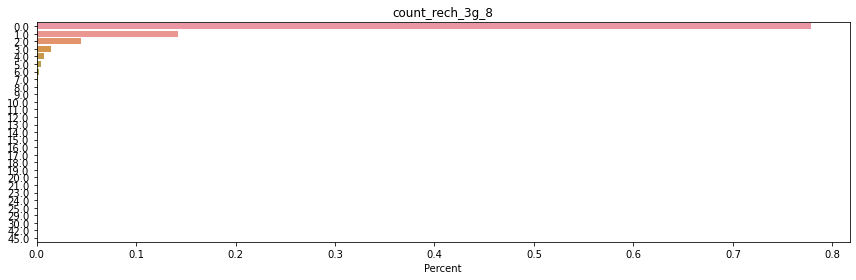

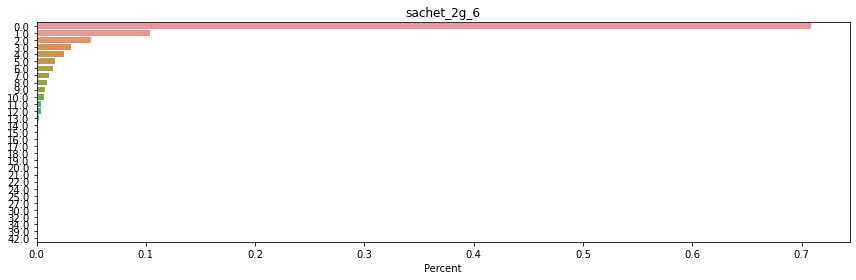

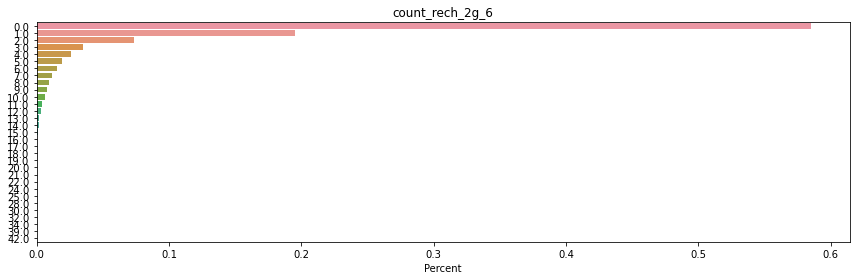

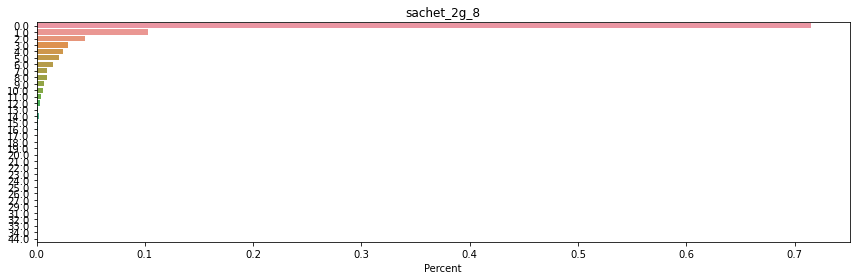

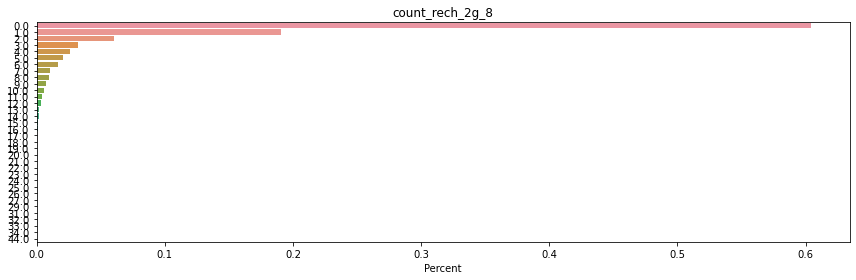

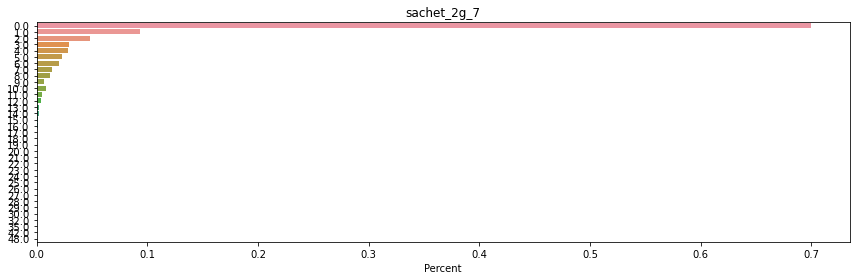

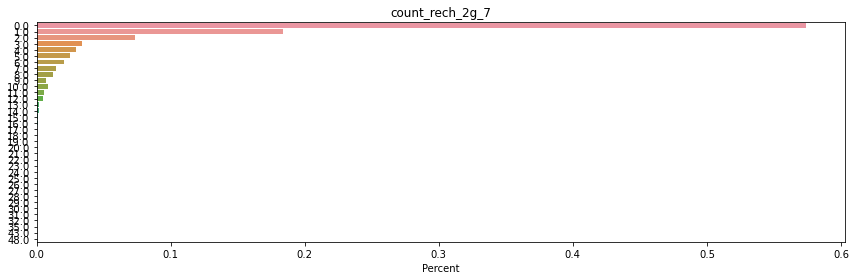

In [65]:
## Data Distribution for categorical features
plt.figure(figsize = (15,40))
for i in CAT:
    plt.figure(figsize=(12,4))
    sns.barplot(y = TEL_HVC_DF[i].value_counts().index, x = TEL_HVC_DF[i].value_counts(normalize=True)
                ,orient='h')
    plt.title(str(i))
    plt.xlabel('Percent')
    plt.tight_layout()
    plt.show()

In [66]:
for features in CAT:
    print("Data Distribution for"+" "+ str(features))
    print(round(TEL_HVC_DF[features].value_counts(normalize=True)*100),2)
    print('--'*50)

Data Distribution for churn
0.0    92.0
1.0     8.0
Name: churn, dtype: float64 2
----------------------------------------------------------------------------------------------------
Data Distribution for night_pck_user_6
0.0    99.0
1.0     1.0
Name: night_pck_user_6, dtype: float64 2
----------------------------------------------------------------------------------------------------
Data Distribution for night_pck_user_7
0.0    99.0
1.0     1.0
Name: night_pck_user_7, dtype: float64 2
----------------------------------------------------------------------------------------------------
Data Distribution for night_pck_user_8
0.0    99.0
1.0     1.0
Name: night_pck_user_8, dtype: float64 2
----------------------------------------------------------------------------------------------------
Data Distribution for fb_user_8
0.0    52.0
1.0    48.0
Name: fb_user_8, dtype: float64 2
----------------------------------------------------------------------------------------------------
Data Distri

- Need to drop low variance features like 'night_pck_user_6','night_pck_user_7','night_pck_user_8'.
- The 2g/3g recharge,sachet & montly can be clubbed under other features as they have multiple categories with low percntages.

In [67]:
TEL_HVC_DF.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1,inplace=True)

## Bivariate Analysis

In [68]:
TEL_HVC_DF.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803        7.146         2.37         0.00   
7   1069.180  1349.850  3171.480       57.840        54.68        52.29   
8    378.721   492.223   137.362      413.690       351.03        35.08   
21   514.453   597.753   637.760      102.410       132.11        85.14   
23    74.350   193.897   366.966       48.960        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         52.164        34.782          0.00           0.00           0.00   
7        453.430       567.160        325.91          16.23          33.49   
8         94.660        80.630        136.48           0.00           0.00   
21       757.930       896.680        983.39           0.00           0.00   
23        85.410        89.360        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              7.146             2.294              0.00            49.576   
7             51.390            31.380             40.28           308.630   
8            297.130           217.590             12.49            80.960   
21             4.480             6.160             23.34            91.810   
23            48.960            50.660             33.58            82.940   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             28.898              0.00             0.978              0.00   
7            447.380            162.28            62.130             55.14   
8             70.580             50.54             0.000              0.00   
21            87.930            104.81             0.750              0.00   
23            83.010            148.56             0.000              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00             1.366             0.516              0.00   
7              53.23             0.000             0.000              0.00   
8               0.00             0.000             0.000              7.15   
21              1.58             0.000             0.000              0.00   
23              0.00             0.000             0.000             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         57.706        31.194          0.00              0.00   
7        422.160       533.910        255.79              4.30   
8        378.090       288.180         63.04            116.56   
21        97.040        94.090        129.74             97.93   
23       131.910       133.680        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.076              0.00              0.00             4.262   
7             23.290             12.01             49.89            31.760   
8            133.430             22.58             13.69            10.040   
21           125.940             61.79            665.36           808.740   
23             0.000              0.00              2.36             6.350   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [69]:
if [column for column in TEL_HVC_DF.columns if len(TEL_HVC_DF[column].unique()) <=20]:
     CAT = [column for column in TEL_HVC_DF.columns if len(TEL_HVC_DF[column].unique()) <=20]

In [70]:
print(CAT)

['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']


In [71]:
NUM = []

for j in TEL_HVC_DF.columns:
    if j not in CAT:
        NUM.append(j)
        
NUM

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'lo

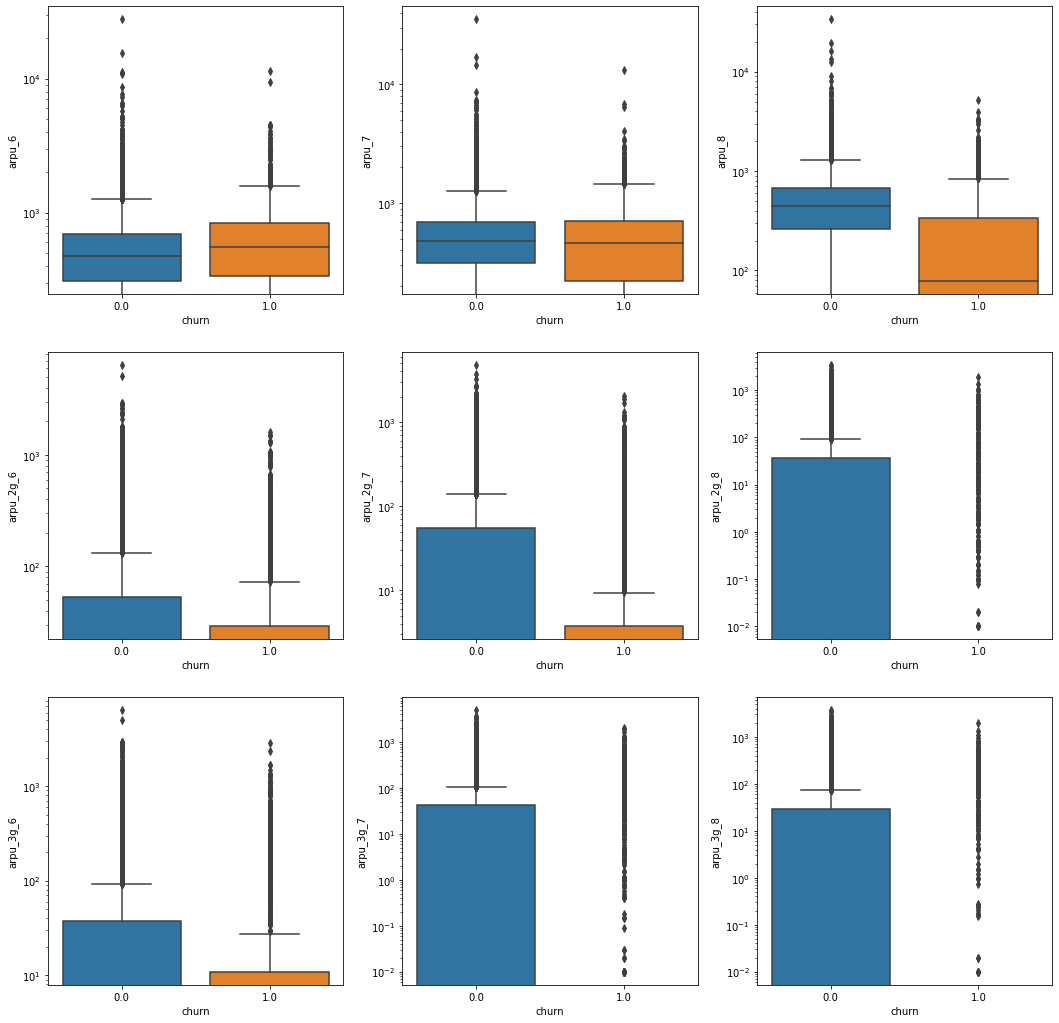

In [72]:
# Average revenue per user (arpu)
arpu = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8','arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']

plt.figure(figsize=(18, 18))

for i in enumerate(arpu):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(y=TEL_HVC_DF[i[1]], x=TEL_HVC_DF.churn)
    plt.yscale('log')
plt.show()

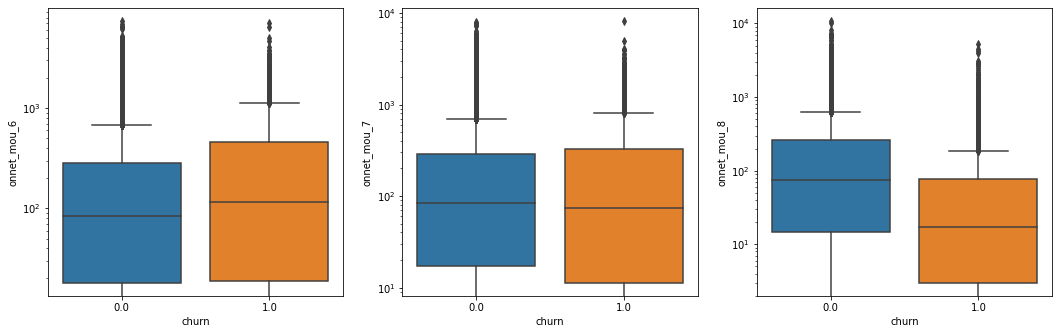

In [73]:
## Calls within same operator network
onnet = ['onnet_mou_6','onnet_mou_7','onnet_mou_8']

plt.figure(figsize=(18, 18))
for i in enumerate(onnet):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(y=TEL_HVC_DF[i[1]], x=TEL_HVC_DF.churn)
    plt.yscale('log')
plt.show()

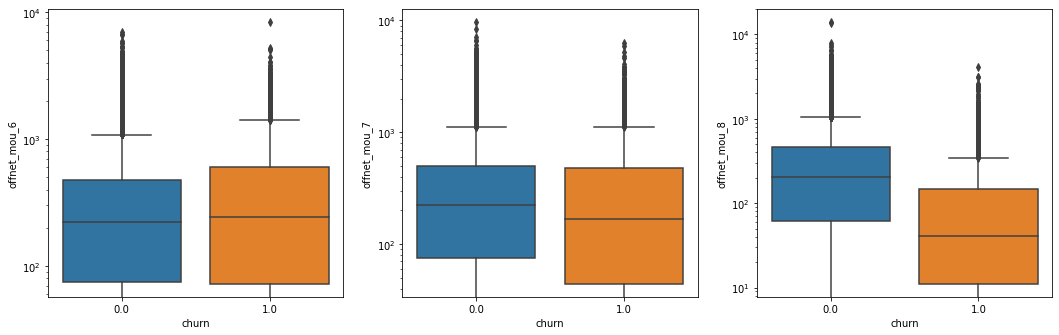

In [74]:
## Calls outside operator T network
offnet = ['offnet_mou_6','offnet_mou_7','offnet_mou_8']

plt.figure(figsize=(18,18))
for i in enumerate(offnet):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(y=TEL_HVC_DF[i[1]], x=TEL_HVC_DF.churn)
    plt.yscale('log')
plt.show()

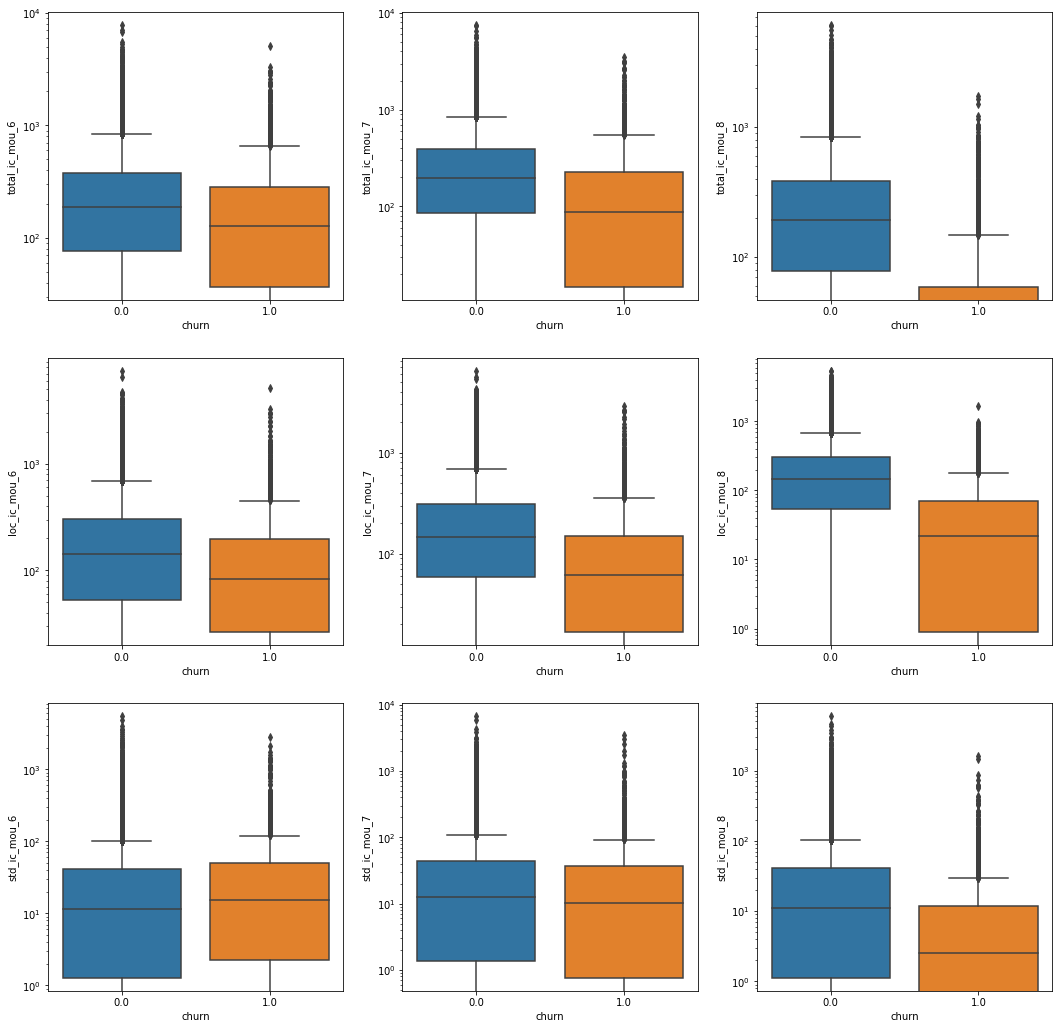

In [75]:
## Incoming calls (IC)

IC = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','loc_ic_mou_6',
    'loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8',]
plt.figure(figsize=(18, 18))
for i in enumerate(IC):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(y=TEL_HVC_DF[i[1]], x=TEL_HVC_DF.churn)
    plt.yscale('log')
plt.show()

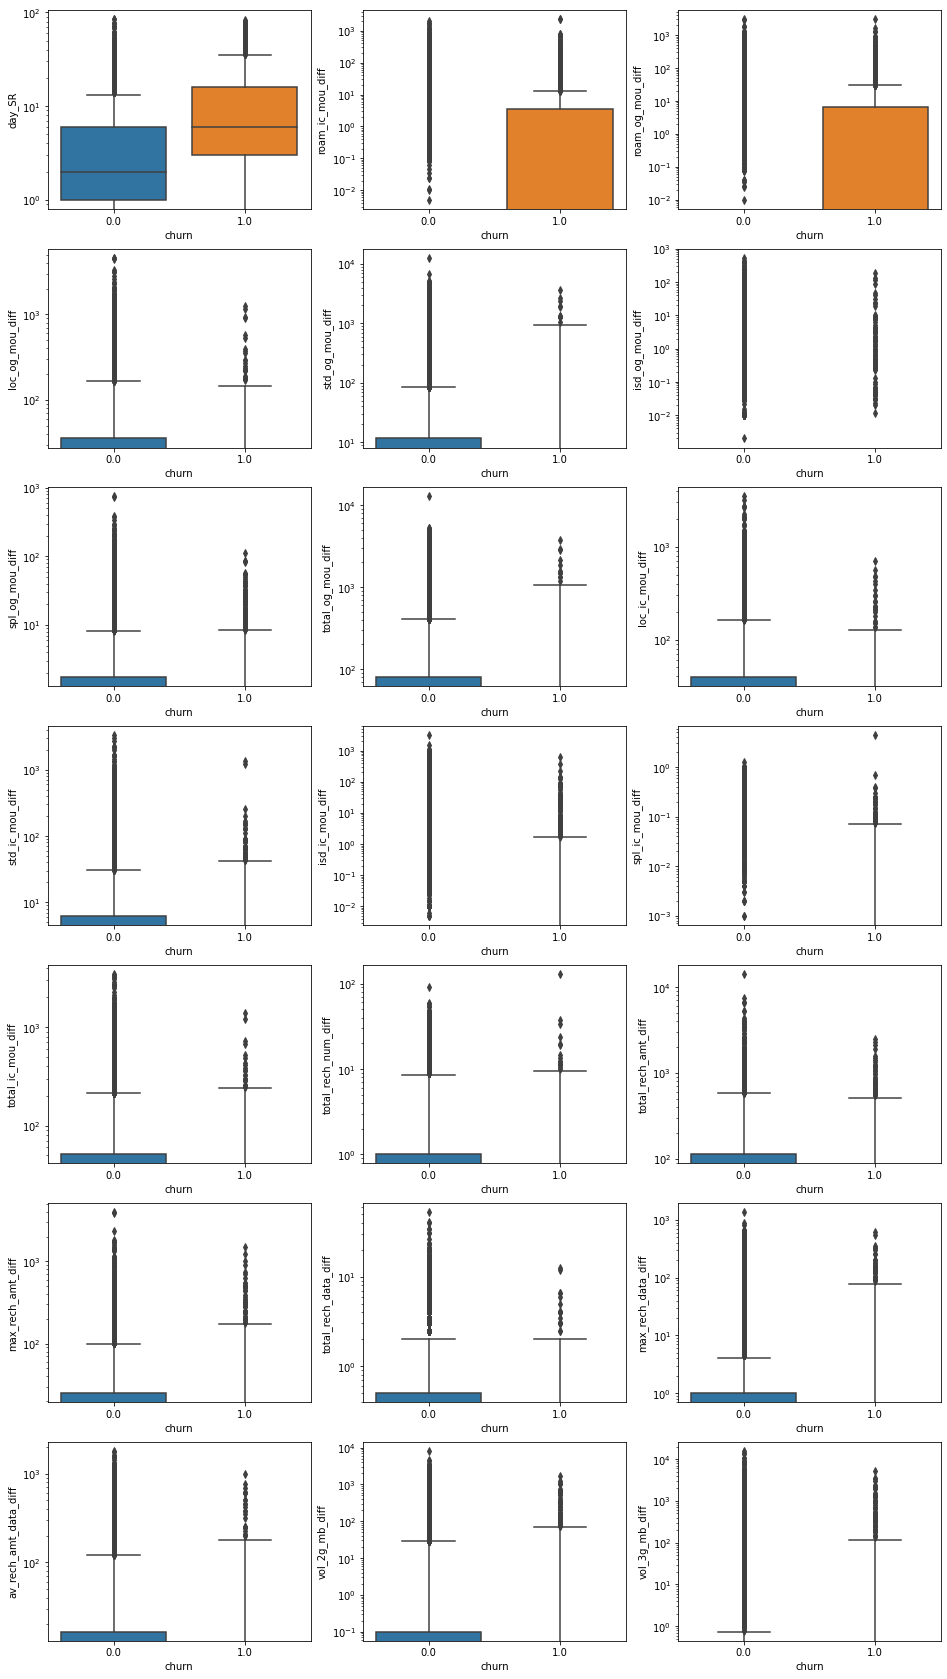

In [76]:
 others =['day_SR','roam_ic_mou_diff','roam_og_mou_diff',
    'loc_og_mou_diff','std_og_mou_diff', 'isd_og_mou_diff','spl_og_mou_diff','total_og_mou_diff',
    'loc_ic_mou_diff','std_ic_mou_diff','isd_ic_mou_diff','spl_ic_mou_diff','total_ic_mou_diff',
    'total_rech_num_diff', 'total_rech_amt_diff','max_rech_amt_diff','total_rech_data_diff',
    'max_rech_data_diff','av_rech_amt_data_diff','vol_2g_mb_diff','vol_3g_mb_diff']

plt.figure(figsize=(16, 30))
for i in enumerate(others):
    plt.subplot(7,3, i[0]+1)
    sns.boxplot(y=TEL_HVC_DF[i[1]], x=TEL_HVC_DF.churn)
    plt.yscale('log')
plt.show() 

- Average revenue per user show an over decline with time within churn users.<br>
- The calls within and outside networks have declined in the 8th month.<br>
- Incoming (Local and STD) calls show a drop in the 8th month <br>
- Higher churn is seen when the days since last recharge is higher. <br>
- All the difference columns shows that the churned customers have no difference in recharge amount or usage amount in the 8th month w.r.t. the average of 6th and 7th month.

**Correlation between the numerical attributes**

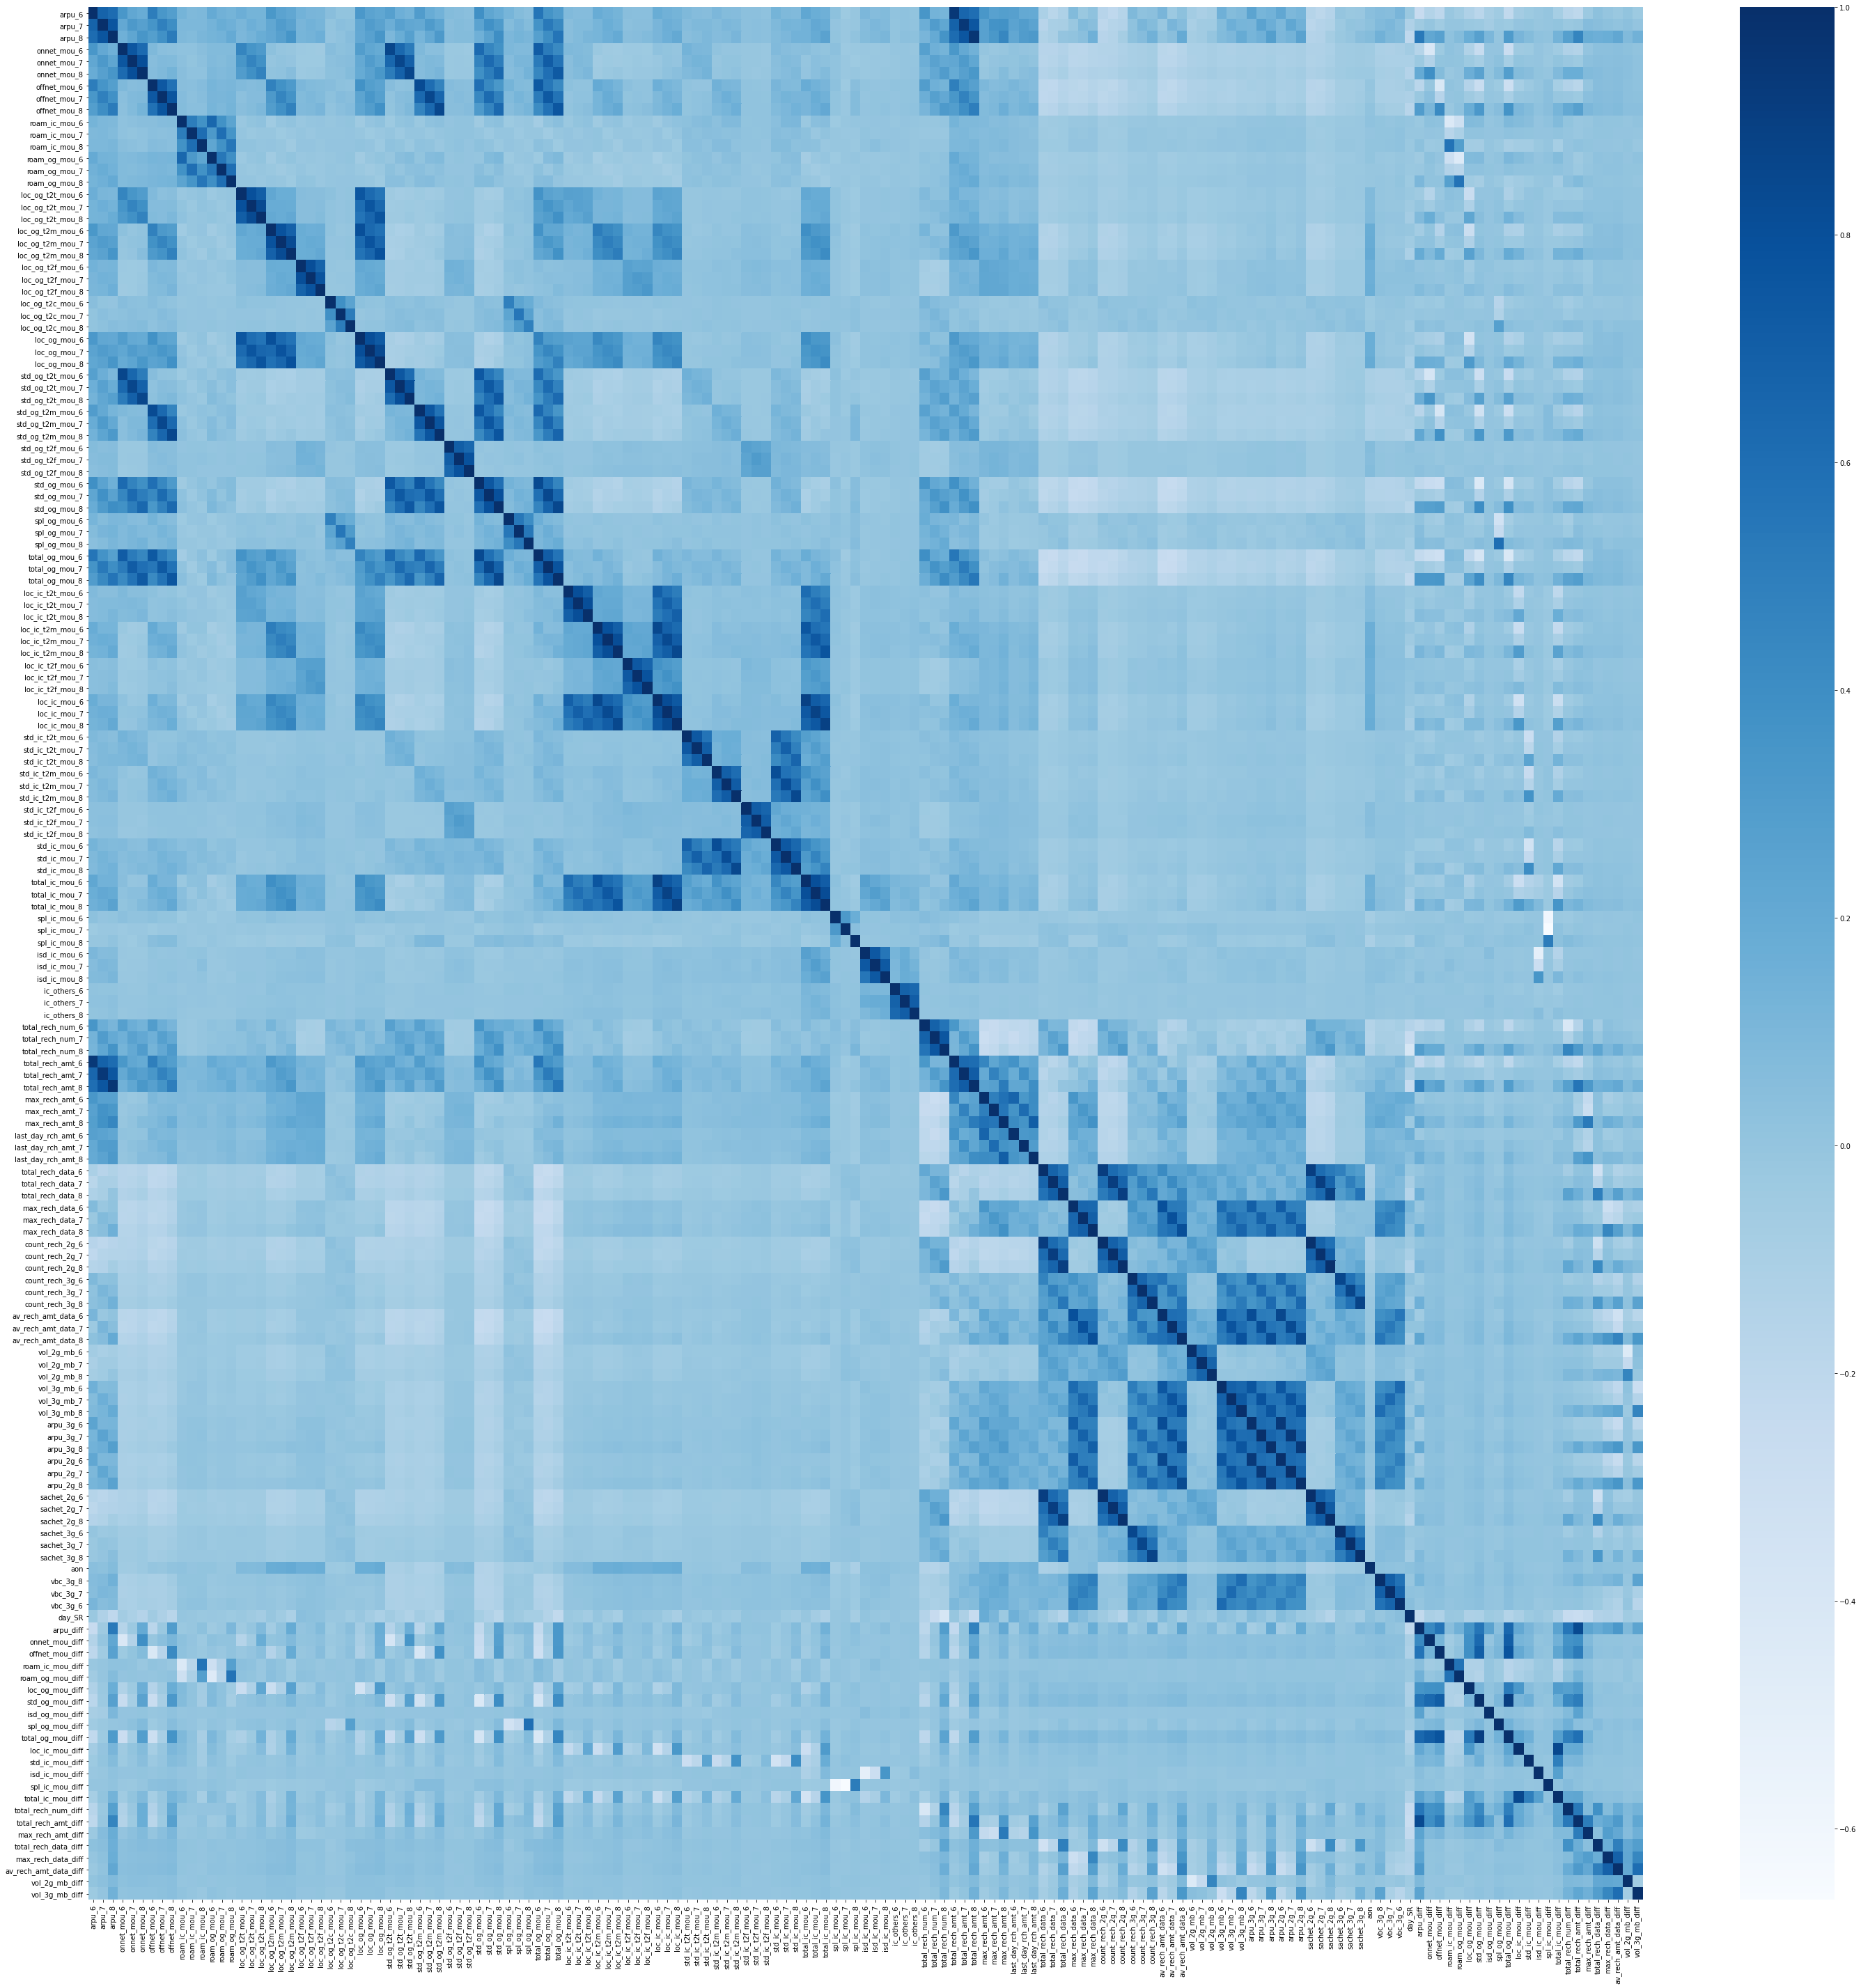

In [77]:
## Heatmap for correlation
plt.figure(figsize=(50,50))
sns.heatmap(TEL_HVC_DF[NUM].corr(),cmap="Blues")
plt.show()

In [78]:
# Getting top correlations in the dataset
CORR = TEL_HVC_DF.corr().abs()

CORR_DF = CORR.where(np.triu(np.ones(CORR.shape), k=1).astype(np.bool))
CORR_DF = CORR_DF.unstack().reset_index()
CORR_DF.columns = ['Variable-1', 'Variable-2', 'CORR']
CORR_DF.dropna(subset=['CORR'], inplace=True)
CORR_DF['CORR'] = round(CORR_DF['CORR'], 2)
CORR_DF.sort_values(by='CORR', ascending=False).head(30)

Variable-1          Variable-2  CORR
21480        sachet_2g_8     count_rech_2g_8  0.99
21312        sachet_2g_7     count_rech_2g_7  0.99
21144        sachet_2g_6     count_rech_2g_6  0.98
14865   total_rech_amt_8              arpu_8  0.96
14529   total_rech_amt_6              arpu_6  0.95
20157          arpu_2g_6           arpu_3g_6  0.94
14697   total_rech_amt_7              arpu_7  0.94
20325          arpu_2g_7           arpu_3g_7  0.94
20493          arpu_2g_8           arpu_3g_8  0.94
17466    count_rech_2g_8   total_rech_data_8  0.91
17130    count_rech_2g_6   total_rech_data_6  0.91
17298    count_rech_2g_7   total_rech_data_7  0.91
12081     total_ic_mou_6        loc_ic_mou_6  0.90
25533  total_og_mou_diff     std_og_mou_diff  0.90
21306        sachet_2g_7   total_rech_data_7  0.90
21474        sachet_2g_8   total_rech_data_8  0.90
21138        sachet_2g_6   total_rech_data_6  0.90
12417     total_ic_mou_8        loc_ic_mou_8  0.89
12249     total_ic_mou_7        loc_ic_mou_7  0.88
22485        sachet_3g_8     count_rech_3g_8  0.88
5181    std_og_t2t_mou_7         onnet_mou_7  0.86
5349    std_og_t2t_mou_8         onnet_mou_8  0.86
22317        sachet_3g_7     count_rech_3g_7  0.86
5013    std_og_t2t_mou_6         onnet_mou_6  0.86
7722      total_og_mou_7        std_og_mou_7  0.85
21831       monthly_3g_7           arpu_2g_7  0.85
22149        sachet_3g_6     count_rech_3g_6  0.85
7890      total_og_mou_8        std_og_mou_8  0.85
20148          arpu_2g_6  av_rech_amt_data_6  0.85
5853    std_og_t2m_mou_8        offnet_mou_8  0.85

In [79]:
(TEL_HVC_DF.corr()[['churn']]).sort_values(by='churn',ascending=False)

churn
churn                  1.000000
day_SR                 0.300582
std_og_mou_6           0.126061
std_og_t2m_mou_6       0.098172
roam_og_mou_7          0.097326
std_og_t2t_mou_6       0.090904
total_og_mou_6         0.078321
roam_og_mou_8          0.076634
roam_ic_mou_7          0.072424
onnet_mou_6            0.071166
roam_ic_mou_8          0.069081
roam_og_mou_6          0.067868
arpu_6                 0.067624
total_rech_amt_6       0.066826
total_rech_num_6       0.064596
offnet_mou_6           0.062808
std_og_mou_7           0.055192
roam_ic_mou_6          0.053687
std_og_t2m_mou_7       0.044944
std_og_t2t_mou_7       0.038044
std_ic_t2t_mou_6       0.024751
spl_og_mou_6           0.024746
std_ic_mou_6           0.017188
onnet_mou_7            0.016613
sachet_3g_6            0.010498
roam_ic_mou_diff       0.009609
std_ic_t2m_mou_6       0.007217
last_day_rch_amt_6     0.007169
spl_og_mou_7           0.005329
isd_ic_mou_6           0.005292
loc_og_t2c_mou_7       0.005069
offnet_mou_7           0.004866
max_rech_amt_6         0.004511
count_rech_3g_6        0.003688
spl_ic_mou_6           0.002269
std_ic_t2t_mou_7       0.001903
loc_og_t2c_mou_6       0.001206
arpu_2g_6             -0.000050
total_og_mou_7        -0.000356
sachet_3g_7           -0.001713
roam_og_mou_diff      -0.002145
arpu_3g_6             -0.002283
spl_ic_mou_7          -0.003742
sachet_2g_6           -0.004341
ic_others_6           -0.004533
isd_ic_mou_7          -0.004968
std_ic_mou_7          -0.009325
monthly_3g_6          -0.009852
total_rech_num_7      -0.010208
total_rech_data_6     -0.010847
std_ic_t2m_mou_7      -0.011186
ic_others_7           -0.011909
std_og_t2f_mou_6      -0.012334
arpu_7                -0.012789
vol_2g_mb_6           -0.013302
count_rech_2g_6       -0.013995
std_ic_t2f_mou_6      -0.014074
std_og_t2f_mou_7      -0.015793
ic_others_8           -0.017076
total_rech_amt_7      -0.017480
std_ic_t2f_mou_7      -0.018312
vol_3g_mb_6           -0.020471
max_rech_amt_7        -0.021023
count_rech_3g_7       -0.021225
isd_ic_mou_diff       -0.023756
loc_og_t2c_mou_8      -0.024732
isd_ic_mou_8          -0.026401
arpu_2g_7             -0.028989
std_ic_t2f_mou_8      -0.029105
av_rech_amt_data_6    -0.030643
arpu_3g_7             -0.030768
vbc_3g_6              -0.031014
loc_og_t2t_mou_6      -0.031504
spl_ic_mou_diff       -0.031602
std_og_t2f_mou_8      -0.031688
vol_2g_mb_7           -0.031742
loc_ic_t2t_mou_6      -0.032237
max_rech_data_6       -0.033530
loc_og_t2f_mou_6      -0.034085
isd_og_mou_diff       -0.034325
std_ic_t2t_mou_8      -0.035817
sachet_2g_7           -0.036603
sachet_3g_8           -0.037132
monthly_3g_7          -0.038485
spl_ic_mou_8          -0.043020
loc_ic_t2f_mou_6      -0.044136
loc_og_t2f_mou_7      -0.044307
last_day_rch_amt_7    -0.045768
spl_og_mou_8          -0.046785
total_ic_mou_6        -0.047631
vol_3g_mb_7           -0.049003
count_rech_2g_7       -0.049004
std_ic_t2m_mou_8      -0.049271
loc_og_t2t_mou_7      -0.049509
std_og_t2t_mou_8      -0.049836
total_rech_data_7     -0.052018
loc_ic_t2f_mou_7      -0.052063
loc_ic_t2t_mou_7      -0.053435
loc_ic_t2m_mou_6      -0.053620
fb_user_6             -0.054941
monthly_2g_6          -0.055485
vbc_3g_7              -0.055555
std_og_t2m_mou_8      -0.056465
loc_og_t2m_mou_6      -0.058121
std_ic_mou_8          -0.059279
loc_og_mou_6          -0.059487
loc_ic_mou_6          -0.060556
loc_og_t2f_mou_8      -0.063038
vol_2g_mb_diff        -0.067041
count_rech_3g_8       -0.067925
max_rech_data_7       -0.069004
spl_og_mou_diff       -0.069006
std_og_mou_8          -0.071055
av_rech_amt_data_7    -0.072251
loc_ic_t2f_mou_8      -0.073949
monthly_3g_8          -0.074256
monthly_2g_7          -0.074259
onnet_mou_8           -0.074372
vol_3g_mb_diff        -0.074916
std_ic_mou_diff       -0.077595
loc_og_t2t_mou_8      -0.077726
arpu_3g_8             -0.078182
vol_2g_mb_8           -0.078595
arpu_2g_8             -0.079387
vol_3g_mb_8           -0.0

- Mutiple features exhibit very high correlation with each other and hence can be dropped <br>
- Dropping sachet_2g_6,sachet_2g_7,sachet_2g_8, arpu_6, arpu_7, arpu_8,arpu_2g_6,arpu_2g_7,count_rech_2g_6, count_rech_2g_7, count_rech_2g_8 with correlation >0.9

In [80]:
TEL_HVC_DF = TEL_HVC_DF.drop(['sachet_2g_6','sachet_2g_7','sachet_2g_8', 'arpu_6','arpu_7', 'arpu_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8'],axis=1)

In [81]:
if [column for column in TEL_HVC_DF.columns if len(TEL_HVC_DF[column].unique()) <=20]:
     CAT = [column for column in TEL_HVC_DF.columns if len(TEL_HVC_DF[column].unique()) <=20]

In [82]:
print (CAT)

['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']


In [83]:
NUM = []

for x in TEL_HVC_DF.columns:
    if x not in CAT:
        NUM.append(x)
        
NUM

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou

In [84]:
len(CAT)

10

In [85]:
len(NUM)

145

In [86]:
TEL_HVC_DF.shape

(30001, 155)

## Post EDA Data Preparation

In [87]:
TEL_HVC_DF[NUM].describe(percentiles=[.25,.5,.75,.90,.95,.99])

onnet_mou_6  onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  30001.000000  30001.00000  30001.000000  30001.000000  30001.000000   
mean     261.349110    268.19393    234.876692    374.894325    379.034885   
std      459.482936    479.82217    458.114367    481.848354    498.345295   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%       18.160000     16.83000     12.460000     73.930000     71.480000   
50%       85.140000     83.19000     66.340000    223.290000    220.340000   
75%      290.530000    290.43000    240.060000    488.040000    494.010000   
90%      754.780000    784.48000    665.080000    896.060000    916.080000   
95%     1135.460000   1185.79000   1074.590000   1256.630000   1272.290000   
99%     2151.740000   2201.96000   2159.110000   2326.360000   2410.890000   
max     7376.710000   8157.78000  10752.560000   8362.360000   9667.130000   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  30001.000000   30001.000000   30001.000000   30001.000000   
mean     336.703572      16.262890      12.806653      12.774625   
std      481.109463      76.405433      75.891240      74.187530   
min        0.000000       0.000000       0.000000       0.000000   
25%       50.880000       0.000000       0.000000       0.000000   
50%      183.380000       0.000000       0.000000       0.000000   
75%      438.990000       0.000000       0.000000       0.000000   
90%      823.680000      28.230000      14.830000      16.490000   
95%     1167.540000      85.510000      56.690000      57.690000   
99%     2193.130000     344.780000     282.790000     282.190000   
max    14007.340000    2613.310000    3813.290000    4169.810000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count   30001.000000   30001.000000   30001.000000      30001.000000   
mean       26.804995      20.334370      20.207594         84.662902   
std       116.305852      96.149334     104.758479        228.738732   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          4.830000   
50%         0.000000       0.000000       0.000000         24.580000   
75%         0.000000       0.000000       0.000000         77.980000   
90%        51.360000      32.480000      31.080000        187.930000   
95%       146.540000     105.180000     101.360000        322.740000   
99%       530.710000     438.590000     427.030000       1006.360000   
max      3775.110000    2812.040000    5337.040000       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          85.859780         78.406132        163.797052        163.506141   
std          240.485071        227.293282        249.848056        241.333526   
min            0.000000          0.000000          0.000000          0.000000   
25%            4.960000          3.380000         20.290000         21.544000   
50%           24.880000         21.210000         77.840000         79.460000   
75%           78.460000         72.160000        209.090000        208.540000   
90%          191.030000        178.980000        419.480000        421.880000   
95%          324.390000        298.990000        604.380000        600.460000   
99%         1018.530000        913.330000       1136.960000       1111.480000   
max         7400.660000      10752.560000       4729.740000       4557.140000   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean         152.582141          6.381614          6.452966          5.943210   
std          233.249397         22.126743         21.946047         19.503004   
min            0.000000          0.000000          0.000000          0.000000   
25%        

In [88]:
TEL_HVC_DF[CAT]

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_7  \
0               0.0           0.0           0.0           1.0           1.0   
7               0.0           0.0           0.0           0.0           0.0   
8               0.0           1.0           0.0           0.0           0.0   
21              0.0           0.0           0.0           0.0           0.0   
23              0.0           0.0           0.0           0.0           2.0   
...             ...           ...           ...           ...           ...   
99981           0.0           0.0           0.0           1.0           1.0   
99984           1.0           0.0           0.0           0.0           0.0   
99986           0.0           0.0           0.0           0.0           0.0   
99988           0.0           1.0           1.0           0.0           0.0   
99997           0.0           0.0           0.0           1.0           2.0   

       monthly_3g_8  fb_user_6  fb_user_7  fb_user_8  churn  
0               1.0        1.0        1.0        1.0    1.0  
7               0.0        0.0        0.0        0.0    1.0  
8               0.0        0.0        1.0        1.0    0.0  
21              0.0        0.0        0.0        0.0    0.0  
23              1.0        0.0        1.0        1.0    0.0  
...             ...        ...        ...        ...    ...  
99981           1.0        1.0        1.0        1.0    0.0  
99984           0.0        1.0        1.0        1.0    0.0  
99986           0.0        1.0        1.0        1.0    0.0  
99988           0.0        0.0        1.0        1.0    0.0  
99997           4.0        1.0        1.0        1.0    0.0  

[30001 rows x 10 columns]

- Most of the categorical features are ordinal

**Outlier Treatment by Power Transformation**

In [89]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

TEL_HVC_final = pd.DataFrame(pt.fit_transform(TEL_HVC_DF),index=TEL_HVC_DF.index)
TEL_HVC_final.columns = TEL_HVC_DF.columns
TEL_HVC_final.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0     -1.054983    -1.371037    -1.736509     -0.837470     -1.010323   
7     -0.161142    -0.174023    -0.071520      0.602966      0.793876   
8      0.937736     0.829608    -0.260646     -0.514256     -0.589351   
21     0.132008     0.276045     0.170068      1.072920      1.223307   
23    -0.242801    -0.210824    -0.280864     -0.573551     -0.531575   

    offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0      -2.014544      -0.521149      -0.457009      -0.492509      -0.523932   
7       0.464727       2.010007       2.288430       2.161080       1.972356   
8      -0.128427      -0.521149      -0.457009      -0.492509      -0.523932   
21      1.399525      -0.521149      -0.457009      -0.492509      -0.523932   
23      0.137631      -0.521149      -0.457009      -0.492509      -0.523932   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0       -0.461457      -0.489033         -0.549650         -1.039814   
7        2.187411       2.145132          0.485321          0.205477   
8       -0.461457      -0.489033          1.505125          1.315100   
21      -0.461457      -0.489033         -0.762826         -0.626519   
23      -0.461457      -0.489033          0.458197          0.470939   

    loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0          -1.560072         -0.215490         -0.529460         -1.748849   
7           0.425703          1.013293          1.320077          0.603098   
8          -0.184796          0.075572         -0.028111         -0.111515   
21          0.135876          0.154510          0.109200          0.318349   
23          0.328240          0.090598          0.072673          0.543850   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0           0.162710         -0.896571         -0.876283          1.684880   
7           1.745429          1.730124          1.736244         -0.555935   
8          -0.888089         -0.896571         -0.876283         -0.555935   
21          0.008651         -0.896571          0.499877         -0.555935   
23         -0.888089         -0.896571         -0.876283         -0.555935   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0           0.914197         -0.575948     -0.404791     -0.733470   
7          -0.575780         -0.575948      0.901549      1.090039   
8          -0.575780          1.981277      0.814808      0.598479   
21         -0.575780         -0.575948     -0.112484     -0.149586   
23         -0.575780          2.003988      0.075329      0.066776   

    loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0      -1.798793         -0.995098         -0.942513         -0.949326   
7       0.594223         -0.076982          0.546385          0.458948   
8      -0.254469          1.036346          1.064830          0.680969   
21      0.154057          0.989563          1.049979          0.985339   
23      0.366855         -0.995098         -0.988844         -0.949326   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0          -1.219389         -0.439868         -1.152998         -0.424904   
7           0.473718          0.312924          0.614819          2.517125   
8          -0.022058         -0.124481          0.767951         -0.424904   
21          1.397047          1.443278          1.530019         -0.424904   
23         -0.657112         -0.295832          0.536380         -0.424904   

    std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0          -0.414195         -0.405838     -1.308121     -0.710075   
7           2.561267          2.619726      0.163347      0.245910   
8          -0.414195         -0.405838      0.447120      0.483299   
21         -0.414195         -0.405838      1.131226      1.191587   
23         -0.414195        

In [90]:
TEL_HVC_final.shape

(30001, 155)

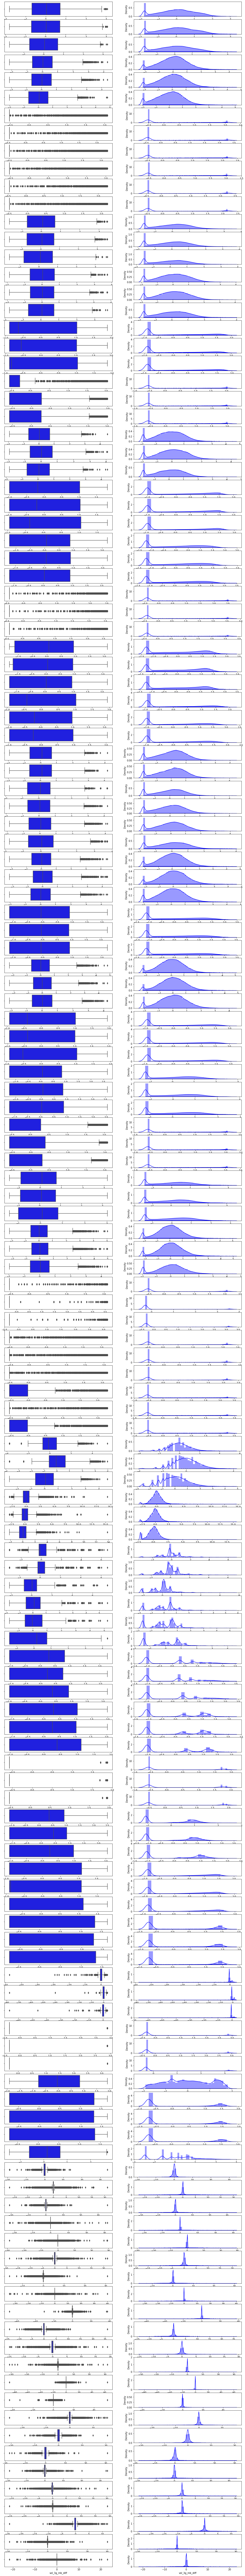

In [91]:
# Revisiting the data distribution
plt.figure(figsize=(18, 200))
for column in enumerate(NUM):
    plt.subplot(len(NUM), 2, 2*column[0]+1)
    sns.boxplot(TEL_HVC_final[column[1]],color='blue')
    plt.subplot(len(NUM), 2, 2*column[0]+2)
    sns.distplot(TEL_HVC_final[column[1]],color='blue',rug=True, kde_kws={'bw':0.1})
plt.show()

<h1>
<font color=Green>Model Building</font>
</h1>

## Splitting data into train and test

- Most of the categorical features show high imbalance in their classification of data into churn and no churn. In such case, splitting into train and test via the usual train-test split functionality of SciKit learn library is not the optimal method, as the model may overfit the train data and may not capture at all any of the test data.<br>
- In such cases, SMOTE algorith from imblearn.over_sampling library can be helpful. Hence, we need to install imblearn first.

In [92]:
!pip install imblearn

In [93]:
from sklearn.model_selection import train_test_split
from collections import Counter


from imblearn.over_sampling import SMOTE
X = TEL_HVC_DF.drop("churn", axis = 1)

y = TEL_HVC_DF.churn

## Using SMOTE to manage the imbalance

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_smote = pd.DataFrame(X_smote, columns=X.columns)

y_smote = pd.Series(y_smote)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, 
                                                    train_size =0.8, 
                                                    test_size = 0.2, 
                                                    random_state = 42 )

print(Counter(y_train))
print(Counter(y_test))

Counter({0.0: 22115, 1.0: 21981})
Counter({1.0: 5579, 0.0: 5445})


## Scaling

In [94]:
scaler = StandardScaler()
X_train[NUM] = scaler.fit_transform(X_train[NUM])
X_test[NUM] = scaler.transform(X_test[NUM])

## Modelling with PCA
Although, modelling without PCA helps in identifying the key predictor variables, but to accurately predict churners PCA can be helpful.

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [96]:
pca = Pipeline([('Dimen_Red', PCA(random_state=42))])

pca.fit(X_train)

Pipeline(steps=[('Dimen_Red', PCA(random_state=42))])

In [97]:
# Extract pca 
pca = pca.named_steps['Dimen_Red']

In [98]:
# Variance vs Cumulative sum
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.69
1       18.75
2       24.60
3       29.91
4       33.69
5       37.28
6       40.32
7       43.25
8       45.76
9       48.03
10      50.21
11      52.16
12      54.12
13      55.98
14      57.76
15      59.47
16      61.08
17      62.59
18      64.06
19      65.47
20      66.83
21      68.10
22      69.35
23      70.58
24      71.74
25      72.87
26      73.95
27      74.97
28      75.98
29      76.95
30      77.90
31      78.81
32      79.69
33      80.56
34      81.39
35      82.16
36      82.92
37      83.64
38      84.33
39      84.97
40      85.57
41      86.16
42      86.72
43      87.27
44      87.79
45      88.25
46      88.68
47      89.11
48      89.54
49      89.94
50      90.33
51      90.70
52      91.06
53      91.42
54      91.76
55      92.09
56      92.42
57      92.75
58      93.06
59      93.38
60      93.68
61      93.98
62      94.26
63      94.54
64      94.81
65      95.06
66      95.30
67      95.53
68      95.75
69      95.97
70      96.19
71    

The first 65 features show 95% variance

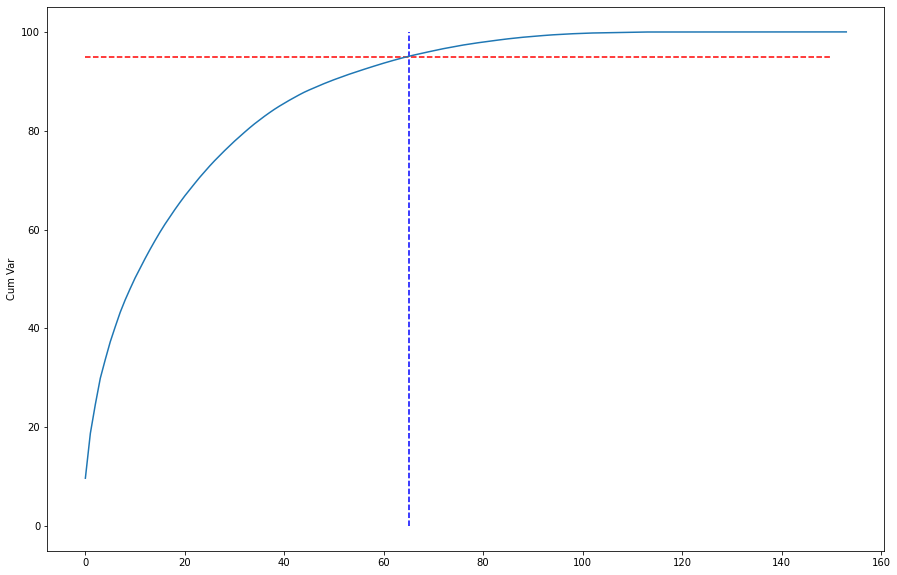

In [99]:
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=2)
fig = plt.figure(figsize=[15,10])
plt.vlines(x=65, ymax=100, ymin=0, colors="b", linestyles="--")
plt.hlines(y=95, xmax=150, xmin=0, colors="r", linestyles="--")

plt.plot(cumulative_variance)
plt.ylabel("Cum Var")
plt.show()

### Logistic Regression

In [100]:
# Logisitc regression pipeline using standard scalar, PCA (Log_PCA)
# 65 features explian 95% variance. 

from sklearn.linear_model import LogisticRegression

Mod_1 = Pipeline([("pca",PCA(n_components = 65)), 
                            ('logistic', LogisticRegression(class_weight = "balanced"))])


Mod_1.fit(X_train, y_train)

print("Model Accuracy is  " , Mod_1.score(X_train, y_train))

Model Accuracy is   0.841368831640058


In [101]:
# Model evaluation on test data 
y_pred = Mod_1.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

print('Accuracy is', round(accuracy_score(y_test, y_pred)*100,2),"\n")

# Confusion Matrix, CM (sensitivity and specificity) 
CM_1 = confusion_matrix(y_test, y_pred)

# Inspect the Confusion matrix
print("Confusion Matrix","\n", CM_1, "\n" )

# Assigning all metrics 
TP = CM_1[1,1] # true positive 
TN = CM_1[0,0] # true negatives
FP = CM_1[0,1] # false positives
FN = CM_1[1,0] # false negatives

print("Senstitivity is ", round(TP/(TP+FN)*100,2), "\n") 
print('Specificity is  ', round(TN/(TN+FP)*100,2), "\n") 

y_pred_probability = Mod_1.predict_proba(X_test)[:, 1]

print("ROC_AUC is ", round(roc_auc_score(y_test, y_pred_probability),2))

Accuracy is 84.72 

Confusion Matrix 
 [[4541  904]
 [ 781 4798]] 

Senstitivity is  86.0 

Specificity is   83.4 

ROC_AUC is  0.91


### Random Forest

In [103]:
!pip install xgboost

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [105]:
## HYPERPARAMETER TUNING

# PCA
pca = PCA(random_state=42)

# In random forest, class weight is used to handle class imbalance, which also adjusts the cost function
forest = RandomForestClassifier(class_weight = "balanced")

# create pipeline
steps = [("pca", pca),("forest", forest)]

# compile pipeline
pca_rf = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [50, 65,70], "forest__max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
gridsearch = GridSearchCV(estimator=pca_rf, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

# fit model
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('forest',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'forest__max_features': ['auto', 0.4],
                         'pca__n_components': [50, 65, 70]},
             scoring='recall', verbose=1)

In [106]:
# Best hyperparameters 

print("Best hyperparameters for Random Forest are ", gridsearch.best_params_)

Best hyperparameters for Random Forest are  {'forest__max_features': 'auto', 'pca__n_components': 70}


In [107]:
model_rf_pca = gridsearch.best_estimator_

In [108]:
# Model evaluation on test data 
y_pred = model_rf_pca.predict(X_test)

print('Accuracy = ', round(accuracy_score(y_test, y_pred)*100,2),"\n")

# Confusion Matrix, CM (sensitivity and specificity) 
CM_1 = confusion_matrix(y_test, y_pred)

# Inspect the Confusion matrix
print("Confusion Matrix","\n", CM_1, "\n" )

# Assigning all metrics 
TP = CM_1[1,1] # true positive 
TN = CM_1[0,0] # true negatives
FP = CM_1[0,1] # false positives
FN = CM_1[1,0] # false negatives

print("Senstitivity is ", round(TP/(TP+FN)*100,2), "\n") 
print('Specificity is  ', round(TN/(TN+FP)*100,2), "\n") 

y_pred_probability = Mod_1.predict_proba(X_test)[:, 1]

print("ROC_AUC is ", round(roc_auc_score(y_test, y_pred_probability),2))

Accuracy =  95.58 

Confusion Matrix 
 [[5143  302]
 [ 185 5394]] 

Senstitivity is  96.68 

Specificity is   94.45 

ROC_AUC is  0.91


**Random Forest appears to be a better model than logistic regression**

### XGBoost Classifier

In [109]:
import xgboost as xgb
from sklearn import metrics
from sklearn import model_selection

xgclassifier = xgb.XGBClassifier()

xgclassifier.fit(X_train, y_train)

print('AUC-train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xgclassifier.predict_proba(X_train)[:, 1]))
print('AUC-test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclassifier.predict_proba(X_test)[:, 1]))

[15:53:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC-train data by XGBoost = 0.9999900392877277
AUC-test data by XGBoost = 0.9959929757580036


In [110]:
# XGboost with PCA
pca = PCA(random_state=42)

xbgc = xgb.XGBClassifier()

# create pipeline steps
steps = [("pca", pca),
         ("xbgc", xbgc)
        ]

# compile pipeline
pca_rf = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [40,60], 'xbgc__learning_rate': [0.3],'xbgc__max_depth': [6,10],'xbgc__min_child_weight': [1],'xbgc__n_estimators': [100,120]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
gridsearch = GridSearchCV(estimator=pca_rf, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

# fit model
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[15:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('xbgc',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_s...
                                                    

In [111]:
# Best hyperparameters 

print("Best hyperparameters for XGBoost Classifiers are ", gridsearch.best_params_)

Best hyperparameters for XGBoost Classifiers are  {'pca__n_components': 60, 'xbgc__learning_rate': 0.3, 'xbgc__max_depth': 10, 'xbgc__min_child_weight': 1, 'xbgc__n_estimators': 120}


In [112]:
model_xgb_pca = gridsearch.best_estimator_

In [113]:
# Model evaluation on test data 
y_pred = model_xgb_pca.predict(X_test)

print('Accuracy = ', round(accuracy_score(y_test, y_pred)*100,2),"\n")

# Confusion Matrix, CM (sensitivity and specificity) 
CM_1 = confusion_matrix(y_test, y_pred)

# Inspect the Confusion matrix
print("Confusion Matrix","\n", CM_1, "\n" )

# Assigning all metrics 
TP = CM_1[1,1] # true positive 
TN = CM_1[0,0] # true negatives
FP = CM_1[0,1] # false positives
FN = CM_1[1,0] # false negatives

print("Senstitivity is ", round(TP/(TP+FN)*100,2), "\n") 
print('Specificity is  ', round(TN/(TN+FP)*100,2), "\n") 

y_pred_probability = Mod_1.predict_proba(X_test)[:, 1]

print("ROC_AUC is ", round(roc_auc_score(y_test, y_pred_probability),2))

Accuracy =  96.41 

Confusion Matrix 
 [[5135  310]
 [  86 5493]] 

Senstitivity is  98.46 

Specificity is   94.31 

ROC_AUC is  0.91


**Model (with PCA) Performance**
- Logistic Regression: Accuracy is 84.54 and Sensitivity is 85.84 <br>
- Random Forest: Accuracy is 95.45 and Sensitivity is 96.47 <br>
- XGBoost Classifier: Accuracy is 96.41 and Sensitivity is 98.46 <br>
- All models have same ROC_AUC: 0.91

***XGboost seems to perform the best out of the three, when modelling is done with PCA transformation***

## Modelling without PCA

### Logistic Regression

In [114]:
lm = LogisticRegression()

rfe = RFE(lm,20)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [115]:
# Variable selection through Recurssive Feature Elimination
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['onnet_mou_8', 'offnet_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_6',
       'fb_user_8', 'day_SR', 'total_og_mou_diff', 'total_ic_mou_diff'],
      dtype='object')

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_6', False, 22),
 ('onnet_mou_7', False, 32),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 3),
 ('offnet_mou_7', False, 47),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 123),
 ('roam_ic_mou_7', False, 131),
 ('roam_ic_mou_8', False, 68),
 ('roam_og_mou_6', False, 112),
 ('roam_og_mou_7', False, 18),
 ('roam_og_mou_8', False, 17),
 ('loc_og_t2t_mou_6', False, 85),
 ('loc_og_t2t_mou_7', False, 57),
 ('loc_og_t2t_mou_8', False, 114),
 ('loc_og_t2m_mou_6', False, 6),
 ('loc_og_t2m_mou_7', False, 128),
 ('loc_og_t2m_mou_8', False, 21),
 ('loc_og_t2f_mou_6', False, 86),
 ('loc_og_t2f_mou_7', False, 104),
 ('loc_og_t2f_mou_8', False, 115),
 ('loc_og_t2c_mou_6', False, 106),
 ('loc_og_t2c_mou_7', False, 105),
 ('loc_og_t2c_mou_8', False, 84),
 ('loc_og_mou_6', False, 96),
 ('loc_og_mou_7', False, 100),
 ('loc_og_mou_8', False, 33),
 ('std_og_t2t_mou_6', False, 4),
 ('std_og_t2t_mou_7', False, 111),
 ('std_og_t2t_mou_8', False, 34),
 ('std_og_t2m_mou_6', False, 73),

In [117]:
X_train_rfe = X_train[rfe_columns]
X_test_rfe = X_test[rfe_columns]

In [118]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def sm_logreg(X_train):
    #Constant
    X_train_sm = sm.add_constant(X_train)

    # Model Fit
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    result = logm.fit()
    return result

# Calculate VIF
def vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [119]:
# X_train_RFE
X_train_RFE = X_train[rfe_columns]

# 1st Logistic Regression model after RFE
logm1 = sm_logreg(X_train_RFE)
print(logm1.summary())

# Check for VIF
print(vif(X_train_RFE))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44076
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17011.
Date:                Sun, 30 May 2021   Deviance:                       34022.
Time:                        15:57:56   Pearson chi2:                 1.27e+08
No. Iterations:                    66                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5878      0

Usually features with VIF greater than 10 indicates multicollinearity and needs to be dropped. But, it is always optimal to drop the features (with VIF) one by one and keep on checking the influence on the other features. It might happen that not all the features will need to be dropped and the VIF scenario improves signifcatntly on dropping a few.<br>

Lets start dropping the feature with highest VIF and then keep on checking how it influences the VIF of others.

In [120]:
# Drop total_ic_mou_7 and then update the model to recheck the new VIF scenario
X_train_RFE = X_train_RFE.drop('total_ic_mou_7', axis = 1)

logm3 = sm_logreg(X_train_RFE)
print(logm3.summary())

# Check for VIF
print(vif(X_train_RFE))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44076
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17011.
Date:                Sun, 30 May 2021   Deviance:                       34022.
Time:                        15:57:57   Pearson chi2:                 1.27e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5878      0

In [121]:
# Drop total_ic_mou_6 and then update the model to recheck the new VIF scenario
X_train_RFE = X_train_RFE.drop('total_ic_mou_6', axis = 1)

logm3 = sm_logreg(X_train_RFE)
print(logm3.summary())

# Check for VIF
print(vif(X_train_RFE))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44077
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17105.
Date:                Sun, 30 May 2021   Deviance:                       34210.
Time:                        15:57:58   Pearson chi2:                 1.47e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6251      0

In [122]:
# Drop loc_ic_mou_8 and then update the model to recheck the new VIF scenario
X_train_RFE = X_train_RFE.drop('loc_ic_mou_8', axis = 1)

logm3 = sm_logreg(X_train_RFE)
print(logm3.summary())

# Check for VIF
print(vif(X_train_RFE))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44078
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17297.
Date:                Sun, 30 May 2021   Deviance:                       34594.
Time:                        15:57:58   Pearson chi2:                 1.97e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4570      0

In [123]:
# Drop total_ic_mou_8 and then update the model to recheck the new VIF scenario
X_train_RFE = X_train_RFE.drop('total_ic_mou_8', axis = 1)

logm3 = sm_logreg(X_train_RFE)
print(logm3.summary())

# Check for VIF
print(vif(X_train_RFE))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44079
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17931.
Date:                Sun, 30 May 2021   Deviance:                       35863.
Time:                        15:57:59   Pearson chi2:                 1.18e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3963      0

In [124]:
# Drop total_og_mou_8 and then update the model to recheck the new VIF scenario
X_train_RFE = X_train_RFE.drop('total_og_mou_8', axis = 1)

logm3 = sm_logreg(X_train_RFE)
print(logm3.summary())

# Check for VIF
print(vif(X_train_RFE))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44080
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18310.
Date:                Sun, 30 May 2021   Deviance:                       36620.
Time:                        15:58:00   Pearson chi2:                 1.41e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3693      0

Although the VIFs have now come down below 10, but the dropping needs to continue to see at what stage, the VIF doesnot change further

In [125]:
# Drop loc_ic_mou_6 and then update the model to recheck the new VIF scenario
X_train_RFE = X_train_RFE.drop('loc_ic_mou_6', axis = 1)

logm3 = sm_logreg(X_train_RFE)
print(logm3.summary())

# Check for VIF
print(vif(X_train_RFE))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44081
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18365.
Date:                Sun, 30 May 2021   Deviance:                       36730.
Time:                        15:58:00   Pearson chi2:                 1.58e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3743      0

In [126]:
# Drop std_ic_mou_6 and then update the model to recheck the new VIF scenario
X_train_RFE = X_train_RFE.drop('std_ic_mou_6', axis = 1)

logm3 = sm_logreg(X_train_RFE)
print(logm3.summary())

# Check for VIF
print(vif(X_train_RFE))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44082
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18369.
Date:                Sun, 30 May 2021   Deviance:                       36737.
Time:                        15:58:00   Pearson chi2:                 1.80e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3763      0

In [127]:
# Drop isd_ic_mou_6 and then update the model to recheck the new VIF scenario
X_train_RFE = X_train_RFE.drop('isd_ic_mou_6', axis = 1)

logm3 = sm_logreg(X_train_RFE)
print(logm3.summary())

# Check for VIF
print(vif(X_train_RFE))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44083
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18370.
Date:                Sun, 30 May 2021   Deviance:                       36740.
Time:                        15:58:01   Pearson chi2:                 1.79e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3770      0

**Looks like the reduction in VIF has been gradually diminished and hence no further dropping of features will cause any signifcant change.**

In [128]:
# Final Model
LOG_REG = logm3

# Features of Final Model
Final_features = list(LOG_REG.params.index)
Final_features.remove('const')

print("The features in final model are ", Final_features)

The features in final model are  ['onnet_mou_8', 'offnet_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_6', 'fb_user_8', 'day_SR', 'total_og_mou_diff', 'total_ic_mou_diff']


**The company may be interested in knowing which customers to target to counter the churn rate. The following analysis can help**

In [129]:
X_train_sm = sm.add_constant(X_train[Final_features])
y_train_pred = LOG_REG.predict(X_train_sm)
y_train_pred[:10]

20850    0.784126
29347    0.556945
33463    0.912372
50266    0.996880
45553    0.839207
39067    0.331487
13399    0.154865
4692     0.016294
16946    0.898176
53610    0.978437
dtype: float64

In [130]:
# Reshape into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.7841262 , 0.55694522, 0.91237248, 0.99688016, 0.83920691,
       0.33148739, 0.15486477, 0.01629386, 0.89817563, 0.97843696])

In [131]:
# Create Dataframe with conversion indicator and conversion probability as predicted by the model
y_train_pred_final = pd.DataFrame({"Conversion_Indicator":y_train.values, "Conversion_Probability":y_train_pred})
y_train_pred_final.head(10)

Conversion_Indicator  Conversion_Probability
0                   1.0                0.784126
1                   0.0                0.556945
2                   1.0                0.912372
3                   1.0                0.996880
4                   1.0                0.839207
5                   1.0                0.331487
6                   0.0                0.154865
7                   0.0                0.016294
8                   0.0                0.898176
9                   1.0                0.978437

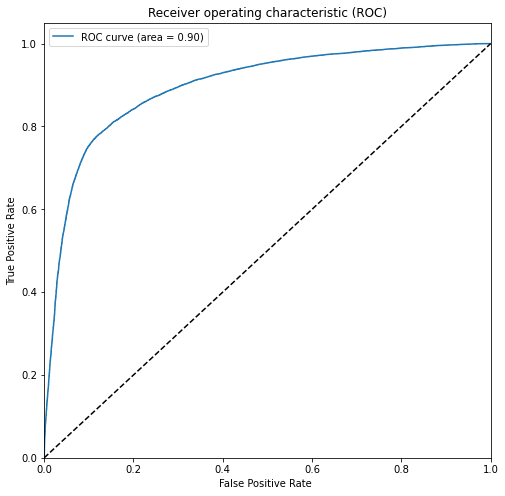

ROC_AUC Score is  0.9


In [132]:
# Let's check the ROC Curve and AUC score
def ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate ') ## False Positive Rate = 1 - True Negative Rate
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="upper left")
    plt.show()

    print('ROC_AUC Score is ',round(auc_score,2))
    
# Draw ROC Curve
ROC(y_train_pred_final.Conversion_Indicator, y_train_pred_final.Conversion_Probability)

In [133]:
# Numerical columns with different probability values 
NUM = [float(x)/10 for x in range(10)]
for i in NUM:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Conversion_Indicator  Conversion_Probability  0.0  0.1  0.2  0.3  0.4  0.5  \
0                   1.0                0.784126    1    1    1    1    1    1   
1                   0.0                0.556945    1    1    1    1    1    1   
2                   1.0                0.912372    1    1    1    1    1    1   
3                   1.0                0.996880    1    1    1    1    1    1   
4                   1.0                0.839207    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    1    1    0    0  
1    0    0    0    0  
2    1    1    1    1  
3    1    1    1    1  
4    1    1    1    0

In [134]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoffs = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

number = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in number:
    CM = metrics.confusion_matrix(y_train_pred_final.Conversion_Indicator, y_train_pred_final[i] )
    total=sum(sum(CM))
    accuracy = (CM[0,0]+CM[1,1])/total
    
    specificity = CM[0,0]/(CM[0,0]+CM[0,1])
    sensitivity = CM[1,1]/(CM[1,0]+CM[1,1])
    cutoffs.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoffs)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.498481     1.000000     0.000000
0.1          0.1  0.651238     0.976844     0.327606
0.2          0.2  0.727640     0.952641     0.504002
0.3          0.3  0.780456     0.915609     0.646123
0.4          0.4  0.812364     0.870661     0.754420
0.5          0.5  0.825381     0.822028     0.828714
0.6          0.6  0.829032     0.769073     0.888628
0.7          0.7  0.805470     0.681543     0.928646
0.8          0.8  0.744149     0.527501     0.959485
0.9          0.9  0.644299     0.306174     0.980375


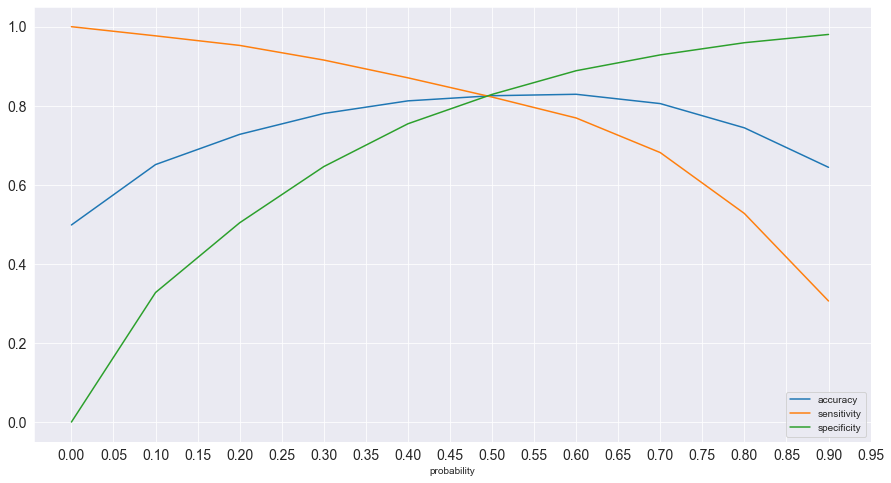

In [135]:
## Optimal Probability Cutoff
sns.set_style("darkgrid")
cutoffs.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(15,8))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 14)
plt.yticks(size = 14)
plt.show()

**Optimal Cutoff probability appears to be around 0.49**

In [136]:
prob_cut_off = 0.49

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > prob_cut_off else 0)

y_train_pred_final.head()

Conversion_Indicator  Conversion_Probability  0.0  0.1  0.2  0.3  0.4  0.5  \
0                   1.0                0.784126    1    1    1    1    1    1   
1                   0.0                0.556945    1    1    1    1    1    1   
2                   1.0                0.912372    1    1    1    1    1    1   
3                   1.0                0.996880    1    1    1    1    1    1   
4                   1.0                0.839207    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    1    1    0    0                1  
1    0    0    0    0                1  
2    1    1    1    1                1  
3    1    1    1    1                1  
4    1    1    1    0                1

In [137]:
Train_CM = metrics.confusion_matrix(y_train_pred_final.Conversion_Indicator, y_train_pred_final.final_predicted)
Train_CM

array([[18178,  3937],
       [ 3812, 18169]], dtype=int64)

In [138]:
X_test_sm = sm.add_constant(X_test[Final_features])
y_test_pred = LOG_REG.predict(X_test_sm)
y_test_pred[:10]

53331    0.856370
43295    0.070214
35108    0.588543
936      0.166094
34795    0.822632
44621    0.923981
51787    0.881941
32749    0.895412
51869    0.756824
17775    0.175312
dtype: float64

In [139]:
# Create Dataframe
y_test_pred_final = pd.DataFrame({"Conversion_Indicator":y_test.values, "Conversion_Probability":y_test_pred})
y_test_pred_final.head()

Conversion_Indicator  Conversion_Probability
53331                   1.0                0.856370
43295                   1.0                0.070214
35108                   1.0                0.588543
936                     0.0                0.166094
34795                   1.0                0.822632

In [140]:
## Creating the "Predicted" column
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Probability'].map(lambda x: 1 if x > prob_cut_off else 0)

y_train_pred_final.head()

y_test_pred_final['Predicted'] = y_test_pred_final['Conversion_Probability'].map(lambda x: 1 if x > prob_cut_off else 0)

y_test_pred_final.head()

Conversion_Indicator  Conversion_Probability  Predicted
53331                   1.0                0.856370          1
43295                   1.0                0.070214          0
35108                   1.0                0.588543          1
936                     0.0                0.166094          0
34795                   1.0                0.822632          1

In [141]:
TP = Train_CM[1,1] # True positive 
TN = Train_CM[0,0] # True negatives
FP = Train_CM[0,1] # False positives
FN = Train_CM[1,0] # False negatives
# Accuracy
print("Train_Accuracy = ",round(metrics.accuracy_score(y_train_pred_final.Conversion_Indicator, y_train_pred_final.Predicted),2))

# Calculate sensitivity
print("Train_Sensitivity =", round(TP/(TP+FN),2))


# Calculate specificity
print("Train_Specificity :", round(TN/(TN+FP),2))


Train_Accuracy =  0.82
Train_Sensitivity = 0.83
Train_Specificity : 0.82


In [142]:
# Predicted values in Test Datset
X_test_sm = sm.add_constant(X_test[Final_features])
y_test_pred = LOG_REG.predict(X_test_sm)


In [143]:
# Create Dataframe with the actual conversion indicator and the probabilities of conversion predicted by the model
y_test_pred_final = pd.DataFrame({"Conversion_Indicator":y_test.values, "Conversion_Probability":y_test_pred})

# Prediction of conversion with probability 0.49
y_test_pred_final['Predicted'] = y_test_pred_final['Conversion_Probability'].map(lambda x: 1 if x > prob_cut_off else 0)

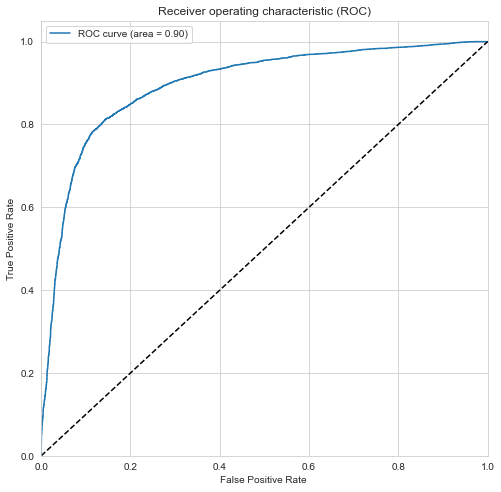

ROC_AUC Score is  0.9


In [144]:
# ROC
sns.set_style("whitegrid")
ROC(y_test_pred_final.Conversion_Indicator, y_test_pred_final.Conversion_Probability)

In [145]:
# Confusion Matrix
Test_CM = metrics.confusion_matrix(y_test_pred_final['Conversion_Indicator'], y_test_pred_final['Predicted'])
print(Test_CM, "\n")

TP = Test_CM[1,1] # True positive 
TN = Test_CM[0,0] # True negatives
FP = Test_CM[0,1] # False positives
FN = Test_CM[1,0] # False negatives

# Accuracy
print("Test_Accuracy : ",round(metrics.accuracy_score(y_test_pred_final.Conversion_Indicator, y_test_pred_final.Predicted),2))

# Calculate the sensitivity
print("Test_Sensitivity :", round(TP/(TP+FN),2))

# Calculate the specificity
print("Test_Specificity  :", round(TN/(TN+FP),2))

[[4498  947]
 [ 935 4644]] 

Test_Accuracy :  0.83
Test_Sensitivity : 0.83
Test_Specificity  : 0.83


**Model performance on train and test data is more or less same**

**Final Model based on Logistic Regression (without PCA) has accuracy and sensitivity scores 0.83 each.**

### Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [147]:
def model_evaluation(dt_classifier):
    print("Train_Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train_Confusion_Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test_Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test_Confusion_Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    
def get_dt_graph(dt_classifier):
    plt.figure(figsize=(60,30))
    plot_tree(dt_classifier, feature_names = X.columns,class_names=['No Churn', "Churn"],filled=True)
    plt.show()

In [148]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       random_state=42)

In [149]:
from sklearn.tree import plot_tree
grid_search.best_estimator_
BEST_DT = grid_search.best_estimator_
model_evaluation(BEST_DT)

Train_Accuracy : 0.8879943759071117
Train_Confusion_Matrix:
[[19041  3074]
 [ 1865 20116]]
--------------------------------------------------
Test_Accuracy : 0.8843432510885341
Test_Confusion_Matrix:
[[4663  782]
 [ 493 5086]]


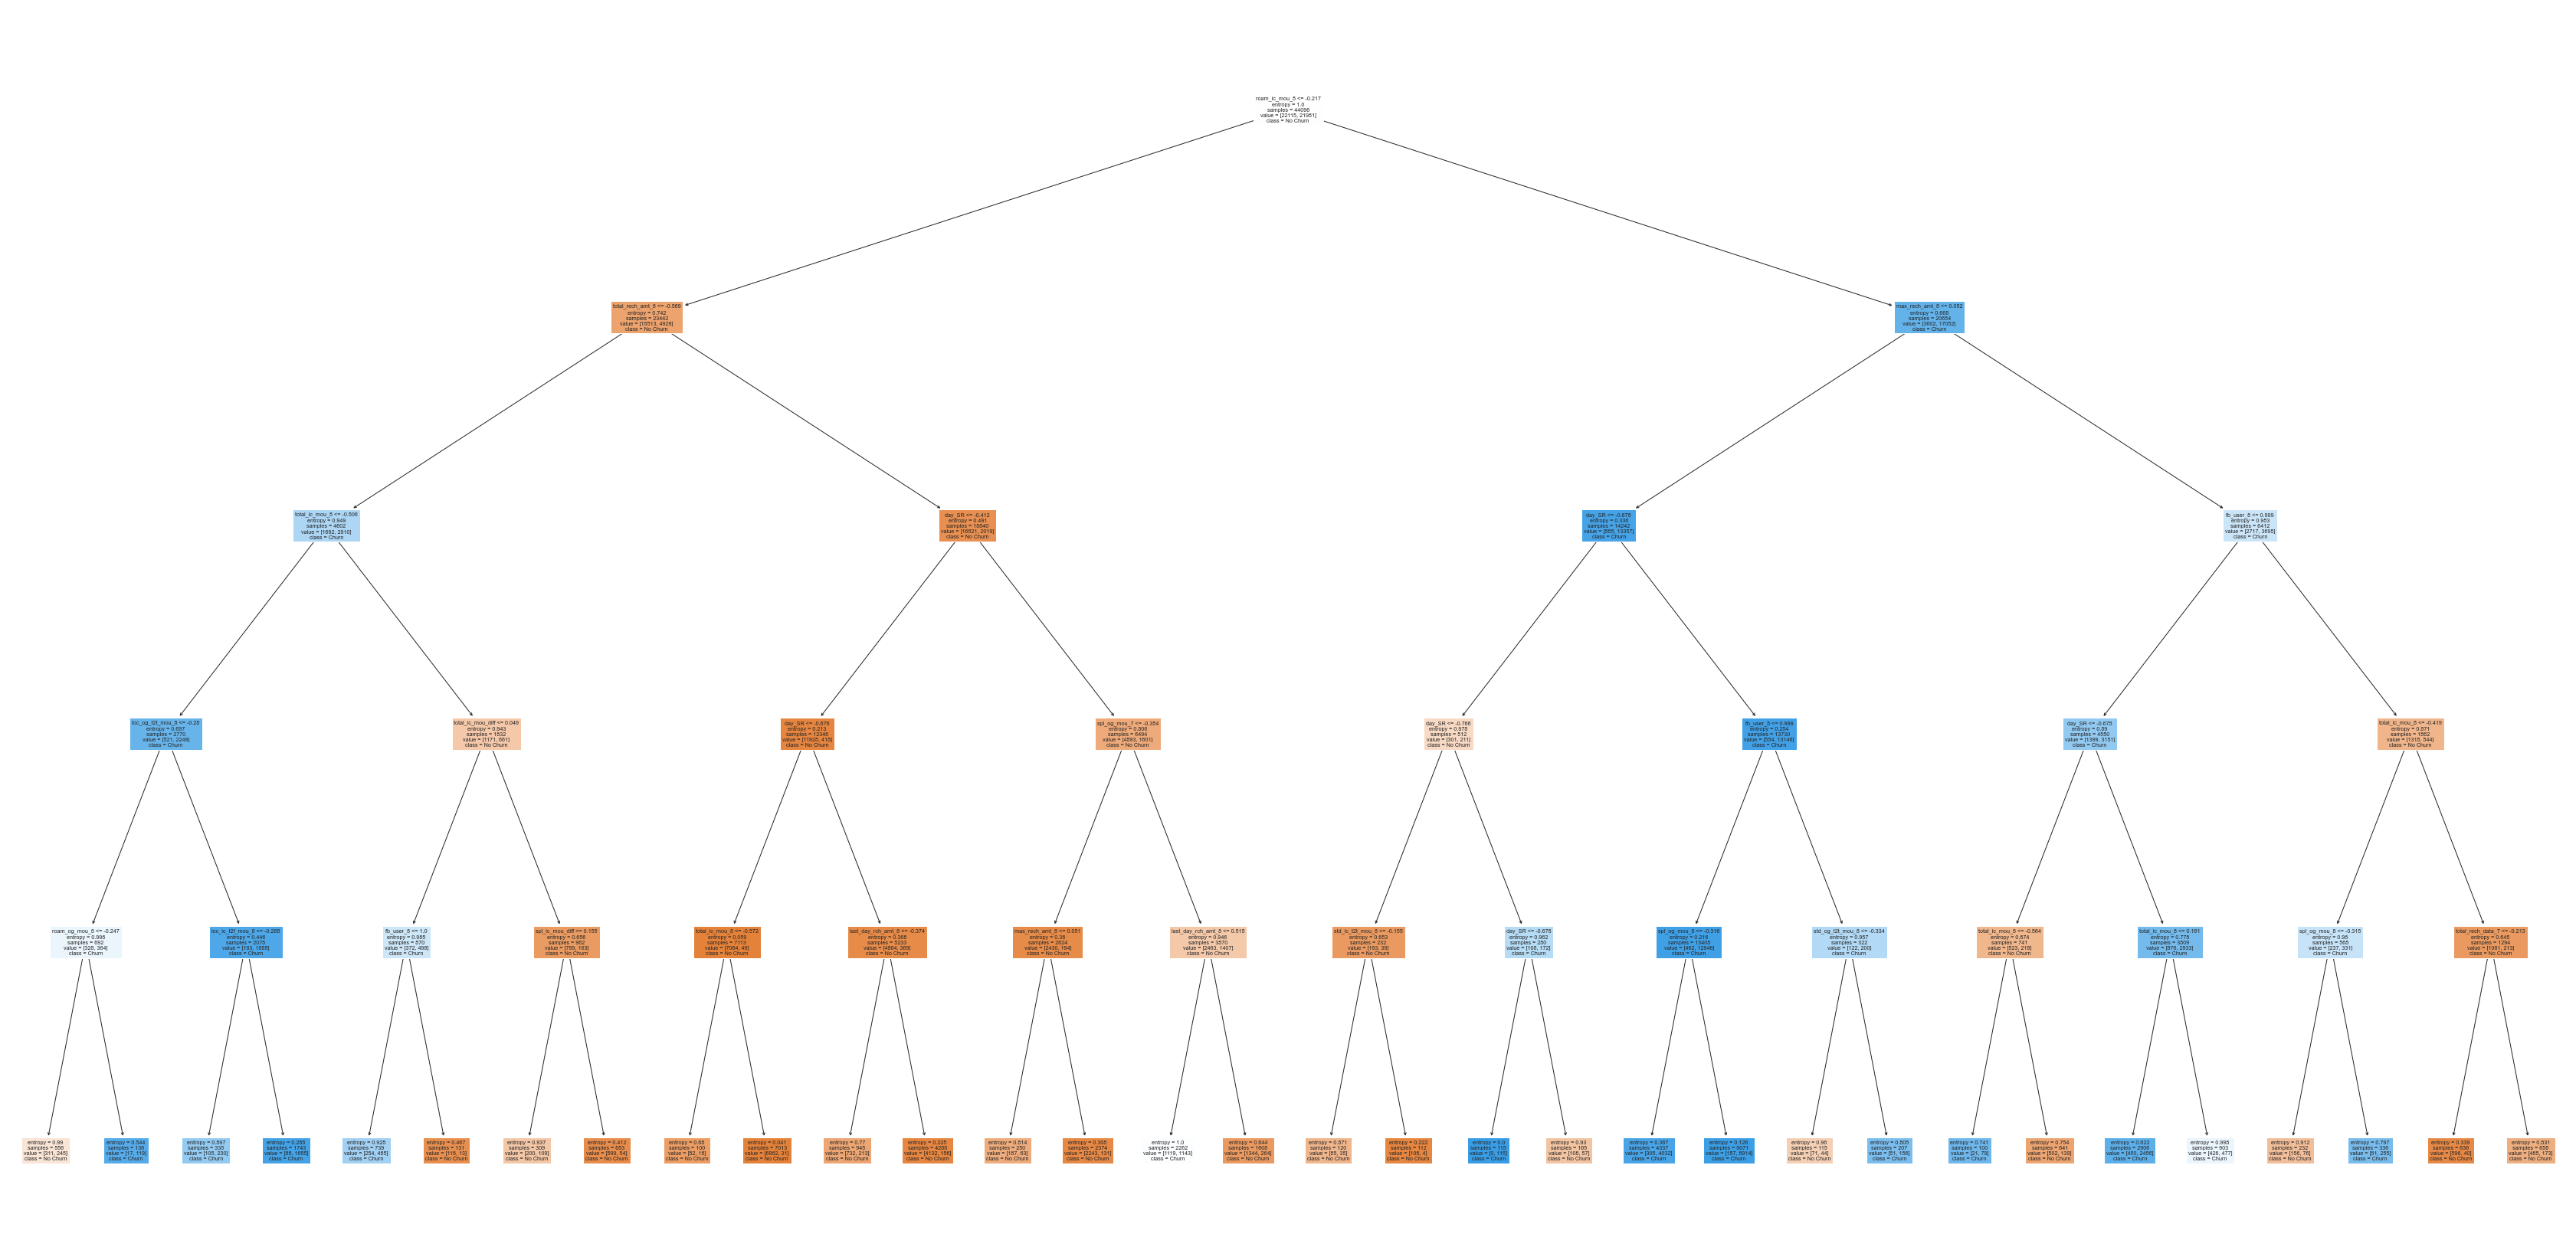

In [150]:
get_dt_graph(BEST_DT)

<h1>
<font color=Green>Evaluation of Model Outcome</font>
</h1>

## Relative Feature Importance

In [151]:
## Feature Importances from Decision Tree model

DT_features = pd.DataFrame({'Coefficients' : BEST_DT.feature_importances_, 'Features': X_train.columns})

DT_features.sort_values(by='Coefficients',ascending=False).head(10)

Coefficients            Features
8        0.473355       roam_ic_mou_8
86       0.138235    total_rech_amt_8
130      0.114014              day_SR
89       0.101393      max_rech_amt_8
71       0.049496      total_ic_mou_8
125      0.037280           fb_user_8
92       0.021718  last_day_rch_amt_8
40       0.021070        spl_og_mou_7
14       0.011529    loc_og_t2t_mou_8
41       0.008852        spl_og_mou_8

In [152]:
## Feature Importances from logistic regression:
Final_features = LOG_REG.params[1:]
print('\033[1m{:10s}\033[0m'.format('Final Feature Coefficients:'))
print(round(Final_features.sort_values(ascending = False),4))

Final Feature Coefficients:
day_SR                1.0174
isd_ic_mou_8         -0.0255
onnet_mou_8          -0.0640
offnet_mou_8         -0.1602
std_ic_mou_8         -0.2183
last_day_rch_amt_8   -0.3649
total_og_mou_diff    -0.3881
total_ic_mou_diff    -0.4255
monthly_2g_6         -0.5683
loc_ic_t2t_mou_8     -0.7413
loc_ic_t2m_mou_8     -1.1564
fb_user_8            -1.4025
dtype: float64


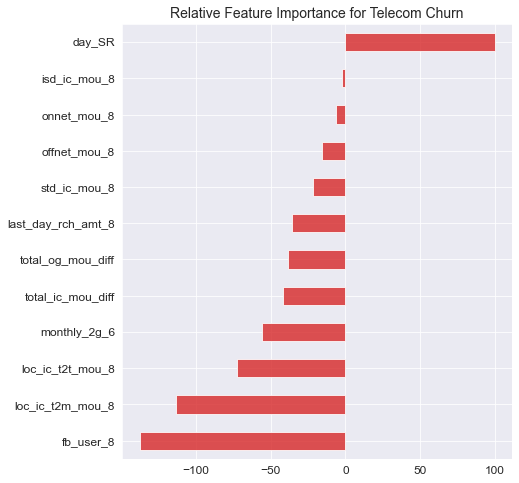

In [153]:
sns.set_style("darkgrid")
Feature_Importance = ((Final_features/Final_features.max())*100).sort_values()
plt.figure(figsize=(7,8))
Feature_Importance.plot.barh(align='center', color = 'tab:Red',alpha=0.8, fontsize = 12)
plt.title('Relative Feature Importance for Telecom Churn', fontsize=14)
plt.show()

<h1>
<font color=Green>Recommendations</font>
</h1>

**Inference**
1. More the time customer takes to recharge higher is the chance that the customer will churn.<br>
2. This data was mostly during the times when 2G was used commonly and 3G rarely. <br>
3. Dataset is from the time when social networking was not of high interest as now and hence importance of internet with better amenities (speed and data pack) was not there.<br>
4. Calls and data usage during roaming seems to behave a great influence on the churn rate.<br>

**Recommendations**
1. Probably offering higher validity period for the recharge at an optimally lower cost will help in retaining the customers.<br>
2. Subscribing social networking services in addition to the call balance could be another efficient way to retain customers.<br>
3. Considering the comparison between 3G and 2G, it is imperative for the business to regularize and rectify the lower level of internet speed status (e.g. 2G w.r.t. 3G or 3G w.r.t. 4G) in areas where the higher level of internet speed status is not wworking fine.<br>
4. For HVC category, attracting customers with optimal ISD services can help in retaining them. <br>
5. Providing customized roaming packages can help in retaining the customers.